In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import warnings
import pickle
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'East Godavari']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
611,611,17.44,81.92,East Godavari,Gangavaram,Gangavaram,Red Soils,5.72,0.05,0.24,...,0.43,13.30,1.28,48.43,0.035733,0.022141,0.252896,0.104427,-0.049623,Topioca
612,612,17.44,81.92,East Godavari,Gangavaram,Gangavaram,Red Soils,5.45,0.06,0.32,...,0.49,16.71,1.54,61.84,0.035733,0.022141,0.252896,0.104427,-0.049623,"Topioca, Cashew"
613,613,17.43,81.92,East Godavari,Gangavaram,Gangavaram,Red Soils,5.93,0.08,0.39,...,0.51,24.27,1.72,47.76,0.037498,0.025191,0.257796,0.106001,-0.050333,Paddy
614,614,17.42,81.91,East Godavari,Gangavaram,Gangavaram,Red Soils,5.33,0.08,0.58,...,0.35,84.06,2.40,33.52,0.044845,0.029772,0.289270,0.120424,-0.056792,Paddy
615,615,17.42,81.91,East Godavari,Gangavaram,Gangavaram,Red Soils,6.95,0.05,0.23,...,0.42,13.43,1.69,32.92,0.044845,0.029772,0.289270,0.120424,-0.056792,"Topica, Paddy"


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'NDVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,6.226818,0.209773,0.482273,12.031591,157.500000,953.750000,206.409091,9.929091,0.894091,0.422955,37.901591,1.845909,36.977727,0.253171
std,0.746171,0.495681,0.217286,18.528432,70.436348,753.495208,153.266346,11.099844,0.581147,0.166616,32.566430,0.899215,19.727601,0.033802
min,4.820000,0.040000,0.080000,0.740000,57.000000,223.000000,33.000000,1.040000,0.320000,0.170000,5.050000,0.500000,5.090000,0.181485
25%,5.767500,0.060000,0.357500,2.415000,106.500000,578.750000,126.750000,3.585000,0.550000,0.290000,13.397500,1.180000,22.590000,0.232759
50%,6.130000,0.090000,0.455000,4.915000,148.000000,753.500000,155.500000,5.695000,0.685000,0.420000,26.960000,1.705000,33.730000,0.270207
75%,6.672500,0.170000,0.580000,9.970000,188.000000,982.500000,245.500000,11.355000,0.972500,0.520000,50.015000,2.455000,47.927500,0.272724
max,8.000000,3.350000,1.180000,82.510000,392.000000,3794.000000,777.000000,56.310000,3.010000,0.810000,121.720000,4.410000,87.300000,0.290940


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Red Soils', 'Red sandy loam'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace('Red Soils', 'Red Soil')
df['SoilType'] = df['SoilType'].replace('Red sandy loam', 'Red Sandy Loam Soil')
df.SoilType.unique()

array(['Red Soil', 'Red Sandy Loam Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Red Soil': 31, 'Red Sandy Loam Soil': 13}

<BarContainer object of 2 artists>

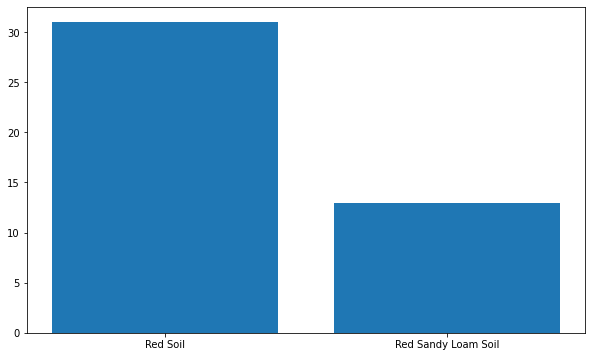

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Topioca  ', 'Topioca, Cashew', 'Paddy', 'Topica, Paddy',
       'Topioca', 'Cashew, Mango', 'Topioca (Sample-2)',
       'Topioca (Sample-1)', 'Paddy (Sample-2)', 'Cotton (Sample-1)',
       'Cotton ', 'Cotton', 'Cotton, Topioca', 'Paddy, Brinjal',
       'Cotton, Redgram', 'Paddy (Sample-1)'], dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy                 21
Cotton                 4
Topioca                4
Cotton (Sample-1)      2
Paddy (Sample-2)       2
Topioca                1
Cashew, Mango          1
Paddy, Brinjal         1
Topioca, Cashew        1
Topioca (Sample-2)     1
Cotton, Topioca        1
Topica, Paddy          1
Topioca (Sample-1)     1
Paddy (Sample-1)       1
Cotton, Redgram        1
Cotton                 1
Name: Crop, dtype: int64

Paddy      25
Cotton      8
Tapioca     8
Name: Crop, dtype: int64


<BarContainer object of 3 artists>

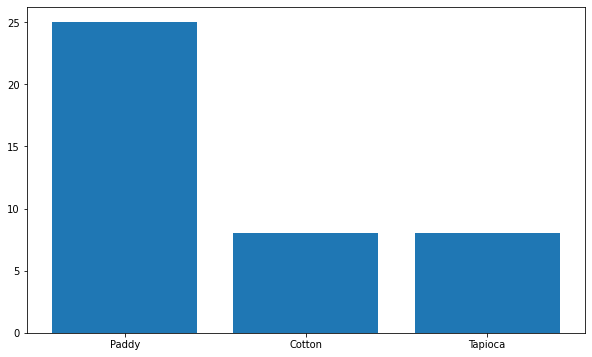

In [15]:
df['Crop'] = df['Crop'].replace(['Cotton (Sample-1)', 'Cotton ', 'Cotton', 'Cotton, Redgram'], 'Cotton')
df['Crop'] = df['Crop'].replace(['Paddy, Brinjal', 'Paddy (Sample-1)', 'Paddy (Sample-2)'], 'Paddy')
df['Crop'] = df['Crop'].replace(['Topioca', 'Topioca, Cashew', 'Topioca  ', 'Topioca (Sample-2)', 'Topioca (Sample-1)'], 'Tapioca')
df = df[(df['Crop'] != 'Topica, Paddy') & (df['Crop'] != 'Cashew, Mango') & (df['Crop'] != 'Cotton, Topioca')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
df = df[(df["Crop"] != 'SweetCorn') & (df["Crop"] != 'Mango') & (df["Crop"] != 'HorseGram')]

In [17]:
# Getting rid of features that have a high correlation among one another

In [18]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
pH,1.000000,0.350693,0.241096,0.127105,0.148829,0.695071,0.591943,0.188963,0.042814,0.043501,-0.141149,0.161902,-0.556459,0.116847
EC,0.350693,1.000000,0.564192,0.163832,0.433282,0.563984,0.397651,0.758502,0.222021,0.528984,-0.033599,0.214563,-0.015411,0.065646
OC,0.241096,0.564192,1.000000,0.296454,0.379856,0.282452,0.266818,0.508410,0.518181,0.539134,0.427353,0.611589,-0.016304,0.079553
P,0.127105,0.163832,0.296454,1.000000,0.236829,0.020361,0.018558,-0.066209,0.878455,0.076579,0.663295,0.462322,-0.154802,0.267315
K,0.148829,0.433282,0.379856,0.236829,1.000000,0.112563,0.267932,0.095924,0.260360,0.464705,-0.060808,-0.074361,0.070945,0.044431
Ca,0.695071,0.563984,0.282452,0.020361,0.112563,1.000000,0.766683,0.346891,-0.021570,0.273129,-0.143852,0.181346,-0.369081,0.055808
Mg,0.591943,0.397651,0.266818,0.018558,0.267932,0.766683,1.000000,0.201328,0.075967,0.373499,-0.086178,0.273140,-0.210540,-0.090892
S,0.188963,0.758502,0.508410,-0.066209,0.095924,0.346891,0.201328,1.000000,0.042084,0.389747,0.068553,0.338286,-0.088672,0.131065
Zn,0.042814,0.222021,0.518181,0.878455,0.260360,-0.021570,0.075967,0.042084,1.000000,0.185091,0.819179,0.623415,-0.016939,0.224745
B,0.043501,0.528984,0.539134,0.076579,0.464705,0.273129,0.373499,0.389747,0.185091,1.000000,0.081734,0.277509,0.175012,0.133132


In [19]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['OC', 'Ca', 'Mg', 'S', 'Zn', 'B', 'Fe', 'Cu']


In [20]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'P', 'K', 'Mn', 'EVI', 'Crop']


In [21]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [22]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

       pH    EC     P      K     Mn       EVI  Red Sandy Loam Soil  Red Soil
611  5.72  0.05  1.24  128.0  48.43  0.252896                    0         1
611    Tapioca
Name: Crop, dtype: object


In [23]:
# Standardizing the independent variables using Feature Scaling
sc = StandardScaler()
X[:, 0:6] = sc.fit_transform(X[:, 0:6])

In [24]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# SMOTE: Synthetic Minority Over-sampling Technique

In [25]:
# Separating the dependent and independent variables
df = df.drop(['SoilType'], axis=1)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [26]:
# Standardizing the independent variables using Feature Scaling
sc2 = StandardScaler()
X[:, :] = sc2.fit_transform(X[:, :])

In [27]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [28]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [29]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [30]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.6842105263157895


In [31]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 63.67 %
Standard Deviation: 18.53 %


# Decision Tree Classifier

In [32]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [33]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [34]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7368421052631579


In [35]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 60.67 %
Standard Deviation: 15.11 %


# Random Forest Classifier

In [36]:
clf3_3 = RandomForestClassifier(random_state=0)
clf3_3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [37]:
y_test_pred = clf3_3.predict(X_test)
y_train_pred = clf3_3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [38]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8421052631578947


In [39]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3_3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 73.33 %
Standard Deviation: 19.89 %


In [40]:
# pickle.dump(clf3_3, open('EG_model.pkl', 'wb'))
# pickle.dump(sc2, open('EG_scaler.pkl', 'wb'))

# XGBoost

In [41]:
clf4_4 = HistGradientBoostingClassifier(random_state=0)
clf4_4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [42]:
y_test_pred = clf4_4.predict(X_test)
y_train_pred = clf4_4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [43]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  0.8571428571428571
Testing Accuracy:  0.5263157894736842


In [44]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4_4, X = X_train, y = y_train, cv = 10)

In [45]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 65.33 %
Standard Deviation: 13.92 %


In [46]:
# pickle.dump(clf4_4, open('Anantapur_model.pkl', 'wb'))
# pickle.dump(sc2, open('Anantapur_scaler.pkl', 'wb'))

# Multi-layer Perceptron Classifier

In [47]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [48]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [49]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.9464285714285714
Testing Accuracy:  0.8421052631578947


In [50]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 73.67 %
Standard Deviation: 10.27 %


# Catboost

In [51]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 1.0276770	total: 149ms	remaining: 14.7s
1:	learn: 0.8873258	total: 149ms	remaining: 7.32s
2:	learn: 0.8005137	total: 150ms	remaining: 4.84s
3:	learn: 0.7124749	total: 150ms	remaining: 3.6s
4:	learn: 0.5954382	total: 150ms	remaining: 2.86s
5:	learn: 0.5291498	total: 151ms	remaining: 2.36s
6:	learn: 0.4868743	total: 151ms	remaining: 2.01s
7:	learn: 0.4652227	total: 151ms	remaining: 1.74s
8:	learn: 0.4045159	total: 152ms	remaining: 1.53s
9:	learn: 0.3779369	total: 152ms	remaining: 1.37s
10:	learn: 0.3204010	total: 152ms	remaining: 1.23s
11:	learn: 0.2895974	total: 153ms	remaining: 1.12s
12:	learn: 0.2720245	total: 153ms	remaining: 1.02s
13:	learn: 0.2466940	total: 153ms	remaining: 942ms
14:	learn: 0.2111521	total: 154ms	remaining: 871ms
15:	learn: 0.2050049	total: 154ms	remaining: 809ms
16:	learn: 0.1921899	total: 154ms	remaining: 754ms
17:	learn: 0.1777842	total: 155ms	remaining: 705ms
18:	learn: 0.1593763	total: 155ms	remaining: 661ms
19:	learn: 0.1412760	total: 155ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.9067774564
bestIteration = 99

Training on fold [1/5]

bestTest = 0.9150163266
bestIteration = 99

Training on fold [2/5]

bestTest = 0.8711286091
bestIteration = 98

Training on fold [3/5]

bestTest = 0.9411899335
bestIteration = 99

Training on fold [4/5]

bestTest = 0.8168211511
bestIteration = 98



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0952277	test: 1.0944638	best: 1.0944638 (0)	total: 562us	remaining: 562ms
1:	learn: 1.0888661	test: 1.0903222	best: 1.0903222 (1)	total: 1.18ms	remaining: 591ms
2:	learn: 1.0807829	test: 1.0808662	best: 1.0808662 (2)	total: 1.69ms	remaining: 563ms
3:	learn: 1.0755573	test: 1.0775915	best: 1.0775915 (3)	total: 2.16ms	remaining: 539ms
4:	learn: 1.0689769	test: 1.0692634	best: 1.0692634 (4)	total: 2.6ms	remaining: 518ms
5:	learn: 1.0616071	test: 1.0606947	best: 1.0606947 (5)	total: 3.05ms	remaining: 505ms
6:	learn: 1.0579668	test: 1.0582855	best: 1.0582855 (6)	total: 3.5ms	remaining: 496ms
7:	learn: 1.0536965	test: 1.0548095	best: 1.0548095 (7)	total: 3.93ms	remaining: 488ms
8:	learn: 1.0439108	test: 1.0433650	best: 1.0433650 (8)	total: 4.39ms	remaining: 483ms
9:	learn: 1.0395369	test: 1.0389784	best: 1.0389784 (9)	total: 4.84ms	remaining: 479ms
10:	learn: 1.0351613	test: 1.0371994	best: 1.0371994 (10)	total: 5.29ms	remaining: 475ms
11:	learn: 1.0307304	test: 1.0354681	best: 1

115:	learn: 0.6055937	test: 0.6632607	best: 0.6632607 (115)	total: 56.3ms	remaining: 429ms
116:	learn: 0.6028002	test: 0.6610540	best: 0.6610540 (116)	total: 56.9ms	remaining: 429ms
117:	learn: 0.6001858	test: 0.6563129	best: 0.6563129 (117)	total: 57.4ms	remaining: 429ms
118:	learn: 0.5984872	test: 0.6547639	best: 0.6547639 (118)	total: 57.9ms	remaining: 428ms
119:	learn: 0.5958494	test: 0.6543765	best: 0.6543765 (119)	total: 58.3ms	remaining: 428ms
120:	learn: 0.5936826	test: 0.6532841	best: 0.6532841 (120)	total: 58.9ms	remaining: 428ms
121:	learn: 0.5912868	test: 0.6520065	best: 0.6520065 (121)	total: 59.5ms	remaining: 428ms
122:	learn: 0.5883987	test: 0.6492709	best: 0.6492709 (122)	total: 60ms	remaining: 428ms
123:	learn: 0.5850752	test: 0.6443247	best: 0.6443247 (123)	total: 60.5ms	remaining: 427ms
124:	learn: 0.5825009	test: 0.6436364	best: 0.6436364 (124)	total: 60.9ms	remaining: 426ms
125:	learn: 0.5801683	test: 0.6406683	best: 0.6406683 (125)	total: 61.3ms	remaining: 425ms
1

311:	learn: 0.2449637	test: 0.3406775	best: 0.3406775 (311)	total: 163ms	remaining: 359ms
312:	learn: 0.2439230	test: 0.3400850	best: 0.3400850 (312)	total: 164ms	remaining: 360ms
313:	learn: 0.2430741	test: 0.3395293	best: 0.3395293 (313)	total: 165ms	remaining: 360ms
314:	learn: 0.2421891	test: 0.3391272	best: 0.3391272 (314)	total: 165ms	remaining: 360ms
315:	learn: 0.2413592	test: 0.3388375	best: 0.3388375 (315)	total: 166ms	remaining: 360ms
316:	learn: 0.2398736	test: 0.3366110	best: 0.3366110 (316)	total: 167ms	remaining: 360ms
317:	learn: 0.2387941	test: 0.3351870	best: 0.3351870 (317)	total: 168ms	remaining: 360ms
318:	learn: 0.2379802	test: 0.3338172	best: 0.3338172 (318)	total: 168ms	remaining: 360ms
319:	learn: 0.2367810	test: 0.3324906	best: 0.3324906 (319)	total: 169ms	remaining: 360ms
320:	learn: 0.2358985	test: 0.3316955	best: 0.3316955 (320)	total: 170ms	remaining: 359ms
321:	learn: 0.2348040	test: 0.3302432	best: 0.3302432 (321)	total: 170ms	remaining: 358ms
322:	learn

410:	learn: 0.1730130	test: 0.2719366	best: 0.2719366 (410)	total: 217ms	remaining: 311ms
411:	learn: 0.1723508	test: 0.2706139	best: 0.2706139 (411)	total: 218ms	remaining: 310ms
412:	learn: 0.1718403	test: 0.2701365	best: 0.2701365 (412)	total: 218ms	remaining: 310ms
413:	learn: 0.1711813	test: 0.2698679	best: 0.2698679 (413)	total: 219ms	remaining: 309ms
414:	learn: 0.1706594	test: 0.2692725	best: 0.2692725 (414)	total: 219ms	remaining: 309ms
415:	learn: 0.1701963	test: 0.2691898	best: 0.2691898 (415)	total: 220ms	remaining: 309ms
416:	learn: 0.1698082	test: 0.2688429	best: 0.2688429 (416)	total: 220ms	remaining: 308ms
417:	learn: 0.1691634	test: 0.2679201	best: 0.2679201 (417)	total: 221ms	remaining: 308ms
418:	learn: 0.1687643	test: 0.2672356	best: 0.2672356 (418)	total: 221ms	remaining: 307ms
419:	learn: 0.1681444	test: 0.2662706	best: 0.2662706 (419)	total: 222ms	remaining: 306ms
420:	learn: 0.1675519	test: 0.2658616	best: 0.2658616 (420)	total: 222ms	remaining: 306ms
421:	learn

640:	learn: 0.0978169	test: 0.1977897	best: 0.1977742 (639)	total: 338ms	remaining: 189ms
641:	learn: 0.0976258	test: 0.1973924	best: 0.1973924 (641)	total: 339ms	remaining: 189ms
642:	learn: 0.0974787	test: 0.1975786	best: 0.1973924 (641)	total: 339ms	remaining: 188ms
643:	learn: 0.0972961	test: 0.1974755	best: 0.1973924 (641)	total: 339ms	remaining: 188ms
644:	learn: 0.0971741	test: 0.1972999	best: 0.1972999 (644)	total: 340ms	remaining: 187ms
645:	learn: 0.0969990	test: 0.1971410	best: 0.1971410 (645)	total: 340ms	remaining: 187ms
646:	learn: 0.0968429	test: 0.1968918	best: 0.1968918 (646)	total: 341ms	remaining: 186ms
647:	learn: 0.0967203	test: 0.1966760	best: 0.1966760 (647)	total: 342ms	remaining: 186ms
648:	learn: 0.0965336	test: 0.1967590	best: 0.1966760 (647)	total: 342ms	remaining: 185ms
649:	learn: 0.0962491	test: 0.1965630	best: 0.1965630 (649)	total: 343ms	remaining: 184ms
650:	learn: 0.0960412	test: 0.1962361	best: 0.1962361 (650)	total: 343ms	remaining: 184ms
651:	learn

924:	learn: 0.0611721	test: 0.1568717	best: 0.1567053 (921)	total: 487ms	remaining: 39.5ms
925:	learn: 0.0610673	test: 0.1566594	best: 0.1566594 (925)	total: 488ms	remaining: 39ms
926:	learn: 0.0610032	test: 0.1566266	best: 0.1566266 (926)	total: 488ms	remaining: 38.5ms
927:	learn: 0.0609340	test: 0.1565703	best: 0.1565703 (927)	total: 489ms	remaining: 37.9ms
928:	learn: 0.0608497	test: 0.1564128	best: 0.1564128 (928)	total: 489ms	remaining: 37.4ms
929:	learn: 0.0607622	test: 0.1562612	best: 0.1562612 (929)	total: 490ms	remaining: 36.9ms
930:	learn: 0.0606623	test: 0.1561216	best: 0.1561216 (930)	total: 490ms	remaining: 36.3ms
931:	learn: 0.0605835	test: 0.1560387	best: 0.1560387 (931)	total: 491ms	remaining: 35.8ms
932:	learn: 0.0604803	test: 0.1560682	best: 0.1560387 (931)	total: 491ms	remaining: 35.3ms
933:	learn: 0.0603369	test: 0.1559161	best: 0.1559161 (933)	total: 492ms	remaining: 34.8ms
934:	learn: 0.0602349	test: 0.1556707	best: 0.1556707 (934)	total: 492ms	remaining: 34.2ms
9

20:	learn: 0.7601417	test: 0.7921358	best: 0.7921358 (20)	total: 11.1ms	remaining: 516ms
21:	learn: 0.7382248	test: 0.7794824	best: 0.7794824 (21)	total: 11.6ms	remaining: 515ms
22:	learn: 0.7282233	test: 0.7743594	best: 0.7743594 (22)	total: 12.4ms	remaining: 525ms
23:	learn: 0.7119886	test: 0.7654479	best: 0.7654479 (23)	total: 12.9ms	remaining: 524ms
24:	learn: 0.7032177	test: 0.7573460	best: 0.7573460 (24)	total: 13.5ms	remaining: 525ms
25:	learn: 0.6893608	test: 0.7459911	best: 0.7459911 (25)	total: 14.1ms	remaining: 527ms
26:	learn: 0.6800398	test: 0.7389590	best: 0.7389590 (26)	total: 14.6ms	remaining: 527ms
27:	learn: 0.6720083	test: 0.7350440	best: 0.7350440 (27)	total: 15.1ms	remaining: 524ms
28:	learn: 0.6597125	test: 0.7253289	best: 0.7253289 (28)	total: 15.6ms	remaining: 521ms
29:	learn: 0.6515437	test: 0.7224617	best: 0.7224617 (29)	total: 16.1ms	remaining: 519ms
30:	learn: 0.6441344	test: 0.7179832	best: 0.7179832 (30)	total: 16.5ms	remaining: 517ms
31:	learn: 0.6346531	

230:	learn: 0.0749293	test: 0.1773165	best: 0.1773165 (230)	total: 118ms	remaining: 393ms
231:	learn: 0.0745246	test: 0.1762302	best: 0.1762302 (231)	total: 119ms	remaining: 393ms
232:	learn: 0.0740306	test: 0.1756569	best: 0.1756569 (232)	total: 119ms	remaining: 392ms
233:	learn: 0.0737266	test: 0.1746817	best: 0.1746817 (233)	total: 120ms	remaining: 392ms
234:	learn: 0.0734189	test: 0.1739700	best: 0.1739700 (234)	total: 120ms	remaining: 391ms
235:	learn: 0.0731129	test: 0.1735102	best: 0.1735102 (235)	total: 121ms	remaining: 391ms
236:	learn: 0.0727826	test: 0.1729334	best: 0.1729334 (236)	total: 121ms	remaining: 390ms
237:	learn: 0.0724568	test: 0.1727035	best: 0.1727035 (237)	total: 122ms	remaining: 390ms
238:	learn: 0.0719405	test: 0.1723253	best: 0.1723253 (238)	total: 122ms	remaining: 390ms
239:	learn: 0.0714702	test: 0.1719336	best: 0.1719336 (239)	total: 123ms	remaining: 389ms
240:	learn: 0.0710748	test: 0.1710819	best: 0.1710819 (240)	total: 123ms	remaining: 388ms
241:	learn

334:	learn: 0.0463054	test: 0.1386866	best: 0.1386624 (333)	total: 172ms	remaining: 342ms
335:	learn: 0.0460603	test: 0.1385255	best: 0.1385255 (335)	total: 173ms	remaining: 342ms
336:	learn: 0.0457881	test: 0.1380561	best: 0.1380561 (336)	total: 174ms	remaining: 342ms
337:	learn: 0.0455888	test: 0.1378822	best: 0.1378822 (337)	total: 174ms	remaining: 341ms
338:	learn: 0.0453587	test: 0.1374424	best: 0.1374424 (338)	total: 175ms	remaining: 341ms
339:	learn: 0.0452041	test: 0.1373536	best: 0.1373536 (339)	total: 175ms	remaining: 341ms
340:	learn: 0.0450071	test: 0.1372384	best: 0.1372384 (340)	total: 176ms	remaining: 340ms
341:	learn: 0.0448265	test: 0.1369494	best: 0.1369494 (341)	total: 177ms	remaining: 340ms
342:	learn: 0.0447008	test: 0.1368717	best: 0.1368717 (342)	total: 177ms	remaining: 339ms
343:	learn: 0.0445564	test: 0.1362535	best: 0.1362535 (343)	total: 178ms	remaining: 339ms
344:	learn: 0.0445007	test: 0.1359206	best: 0.1359206 (344)	total: 178ms	remaining: 338ms
345:	learn

544:	learn: 0.0257526	test: 0.1054083	best: 0.1054083 (544)	total: 283ms	remaining: 236ms
545:	learn: 0.0257133	test: 0.1053250	best: 0.1053250 (545)	total: 284ms	remaining: 236ms
546:	learn: 0.0256570	test: 0.1052230	best: 0.1052230 (546)	total: 284ms	remaining: 235ms
547:	learn: 0.0255974	test: 0.1052729	best: 0.1052230 (546)	total: 285ms	remaining: 235ms
548:	learn: 0.0255480	test: 0.1051646	best: 0.1051646 (548)	total: 285ms	remaining: 234ms
549:	learn: 0.0255282	test: 0.1051560	best: 0.1051560 (549)	total: 286ms	remaining: 234ms
550:	learn: 0.0254975	test: 0.1050479	best: 0.1050479 (550)	total: 287ms	remaining: 234ms
551:	learn: 0.0254497	test: 0.1050925	best: 0.1050479 (550)	total: 287ms	remaining: 233ms
552:	learn: 0.0253799	test: 0.1047744	best: 0.1047744 (552)	total: 288ms	remaining: 233ms
553:	learn: 0.0253322	test: 0.1047846	best: 0.1047744 (552)	total: 288ms	remaining: 232ms
554:	learn: 0.0252756	test: 0.1047208	best: 0.1047208 (554)	total: 289ms	remaining: 232ms
555:	learn

642:	learn: 0.0210425	test: 0.0943682	best: 0.0943682 (642)	total: 335ms	remaining: 186ms
643:	learn: 0.0210088	test: 0.0943260	best: 0.0943260 (643)	total: 336ms	remaining: 186ms
644:	learn: 0.0209806	test: 0.0942704	best: 0.0942704 (644)	total: 336ms	remaining: 185ms
645:	learn: 0.0209428	test: 0.0942729	best: 0.0942704 (644)	total: 337ms	remaining: 185ms
646:	learn: 0.0209053	test: 0.0942497	best: 0.0942497 (646)	total: 337ms	remaining: 184ms
647:	learn: 0.0208809	test: 0.0941466	best: 0.0941466 (647)	total: 338ms	remaining: 184ms
648:	learn: 0.0208558	test: 0.0940974	best: 0.0940974 (648)	total: 339ms	remaining: 183ms
649:	learn: 0.0208001	test: 0.0941013	best: 0.0940974 (648)	total: 339ms	remaining: 183ms
650:	learn: 0.0207627	test: 0.0939819	best: 0.0939819 (650)	total: 340ms	remaining: 182ms
651:	learn: 0.0207354	test: 0.0940528	best: 0.0939819 (650)	total: 340ms	remaining: 181ms
652:	learn: 0.0206816	test: 0.0937433	best: 0.0937433 (652)	total: 340ms	remaining: 181ms
653:	learn

856:	learn: 0.0150484	test: 0.0806411	best: 0.0806411 (856)	total: 443ms	remaining: 74ms
857:	learn: 0.0150302	test: 0.0805734	best: 0.0805734 (857)	total: 444ms	remaining: 73.5ms
858:	learn: 0.0150143	test: 0.0805019	best: 0.0805019 (858)	total: 444ms	remaining: 72.9ms
859:	learn: 0.0149976	test: 0.0804943	best: 0.0804943 (859)	total: 445ms	remaining: 72.4ms
860:	learn: 0.0149806	test: 0.0804719	best: 0.0804719 (860)	total: 446ms	remaining: 72ms
861:	learn: 0.0149648	test: 0.0803509	best: 0.0803509 (861)	total: 447ms	remaining: 71.5ms
862:	learn: 0.0149533	test: 0.0803109	best: 0.0803109 (862)	total: 447ms	remaining: 71ms
863:	learn: 0.0149275	test: 0.0802769	best: 0.0802769 (863)	total: 448ms	remaining: 70.4ms
864:	learn: 0.0149113	test: 0.0802560	best: 0.0802560 (864)	total: 448ms	remaining: 69.9ms
865:	learn: 0.0149029	test: 0.0802582	best: 0.0802560 (864)	total: 448ms	remaining: 69.4ms
866:	learn: 0.0148791	test: 0.0801828	best: 0.0801828 (866)	total: 449ms	remaining: 68.9ms
867:	

961:	learn: 0.0132218	test: 0.0754386	best: 0.0754386 (961)	total: 498ms	remaining: 19.7ms
962:	learn: 0.0132027	test: 0.0753743	best: 0.0753743 (962)	total: 499ms	remaining: 19.2ms
963:	learn: 0.0131877	test: 0.0753112	best: 0.0753112 (963)	total: 499ms	remaining: 18.6ms
964:	learn: 0.0131785	test: 0.0753459	best: 0.0753112 (963)	total: 500ms	remaining: 18.1ms
965:	learn: 0.0131650	test: 0.0753170	best: 0.0753112 (963)	total: 500ms	remaining: 17.6ms
966:	learn: 0.0131504	test: 0.0753381	best: 0.0753112 (963)	total: 501ms	remaining: 17.1ms
967:	learn: 0.0131392	test: 0.0753005	best: 0.0753005 (967)	total: 501ms	remaining: 16.6ms
968:	learn: 0.0131272	test: 0.0752294	best: 0.0752294 (968)	total: 502ms	remaining: 16ms
969:	learn: 0.0131063	test: 0.0750353	best: 0.0750353 (969)	total: 502ms	remaining: 15.5ms
970:	learn: 0.0130885	test: 0.0749870	best: 0.0749870 (970)	total: 503ms	remaining: 15ms
971:	learn: 0.0130607	test: 0.0749295	best: 0.0749295 (971)	total: 503ms	remaining: 14.5ms
972

107:	learn: 0.5888851	test: 0.6879528	best: 0.6879528 (107)	total: 99ms	remaining: 818ms
108:	learn: 0.5853954	test: 0.6847208	best: 0.6847208 (108)	total: 100ms	remaining: 818ms
109:	learn: 0.5825539	test: 0.6823403	best: 0.6823403 (109)	total: 101ms	remaining: 817ms
110:	learn: 0.5804259	test: 0.6805172	best: 0.6805172 (110)	total: 102ms	remaining: 815ms
111:	learn: 0.5792036	test: 0.6797101	best: 0.6797101 (111)	total: 103ms	remaining: 815ms
112:	learn: 0.5765552	test: 0.6772237	best: 0.6772237 (112)	total: 104ms	remaining: 814ms
113:	learn: 0.5735172	test: 0.6750535	best: 0.6750535 (113)	total: 105ms	remaining: 813ms
114:	learn: 0.5697241	test: 0.6712760	best: 0.6712760 (114)	total: 106ms	remaining: 812ms
115:	learn: 0.5665874	test: 0.6687691	best: 0.6687691 (115)	total: 106ms	remaining: 811ms
116:	learn: 0.5637460	test: 0.6649877	best: 0.6649877 (116)	total: 107ms	remaining: 809ms
117:	learn: 0.5607360	test: 0.6626139	best: 0.6626139 (117)	total: 108ms	remaining: 808ms
118:	learn:

287:	learn: 0.2326320	test: 0.3760077	best: 0.3760077 (287)	total: 259ms	remaining: 641ms
288:	learn: 0.2317046	test: 0.3751960	best: 0.3751960 (288)	total: 261ms	remaining: 641ms
289:	learn: 0.2305638	test: 0.3749730	best: 0.3749730 (289)	total: 262ms	remaining: 641ms
290:	learn: 0.2293993	test: 0.3739454	best: 0.3739454 (290)	total: 263ms	remaining: 640ms
291:	learn: 0.2285449	test: 0.3736469	best: 0.3736469 (291)	total: 264ms	remaining: 640ms
292:	learn: 0.2274659	test: 0.3727287	best: 0.3727287 (292)	total: 265ms	remaining: 639ms
293:	learn: 0.2263250	test: 0.3711434	best: 0.3711434 (293)	total: 266ms	remaining: 638ms
294:	learn: 0.2254649	test: 0.3710627	best: 0.3710627 (294)	total: 267ms	remaining: 637ms
295:	learn: 0.2243010	test: 0.3696876	best: 0.3696876 (295)	total: 268ms	remaining: 636ms
296:	learn: 0.2232539	test: 0.3692458	best: 0.3692458 (296)	total: 269ms	remaining: 636ms
297:	learn: 0.2224597	test: 0.3683646	best: 0.3683646 (297)	total: 269ms	remaining: 635ms
298:	learn

480:	learn: 0.1187365	test: 0.2671101	best: 0.2671101 (480)	total: 433ms	remaining: 467ms
481:	learn: 0.1183400	test: 0.2668615	best: 0.2668615 (481)	total: 434ms	remaining: 467ms
482:	learn: 0.1180604	test: 0.2666038	best: 0.2666038 (482)	total: 435ms	remaining: 466ms
483:	learn: 0.1177538	test: 0.2663409	best: 0.2663409 (483)	total: 436ms	remaining: 465ms
484:	learn: 0.1174229	test: 0.2662794	best: 0.2662794 (484)	total: 437ms	remaining: 464ms
485:	learn: 0.1169733	test: 0.2653602	best: 0.2653602 (485)	total: 438ms	remaining: 463ms
486:	learn: 0.1166684	test: 0.2651265	best: 0.2651265 (486)	total: 439ms	remaining: 462ms
487:	learn: 0.1163498	test: 0.2646586	best: 0.2646586 (487)	total: 440ms	remaining: 461ms
488:	learn: 0.1160350	test: 0.2643172	best: 0.2643172 (488)	total: 441ms	remaining: 460ms
489:	learn: 0.1157958	test: 0.2642482	best: 0.2642482 (489)	total: 442ms	remaining: 460ms
490:	learn: 0.1154569	test: 0.2639392	best: 0.2639392 (490)	total: 442ms	remaining: 459ms
491:	learn

684:	learn: 0.0737790	test: 0.2128789	best: 0.2128789 (684)	total: 614ms	remaining: 282ms
685:	learn: 0.0737115	test: 0.2128623	best: 0.2128623 (685)	total: 615ms	remaining: 282ms
686:	learn: 0.0735746	test: 0.2124210	best: 0.2124210 (686)	total: 616ms	remaining: 281ms
687:	learn: 0.0734822	test: 0.2123997	best: 0.2123997 (687)	total: 617ms	remaining: 280ms
688:	learn: 0.0733575	test: 0.2122983	best: 0.2122983 (688)	total: 618ms	remaining: 279ms
689:	learn: 0.0731681	test: 0.2119687	best: 0.2119687 (689)	total: 619ms	remaining: 278ms
690:	learn: 0.0729974	test: 0.2118896	best: 0.2118896 (690)	total: 620ms	remaining: 277ms
691:	learn: 0.0728591	test: 0.2118033	best: 0.2118033 (691)	total: 621ms	remaining: 277ms
692:	learn: 0.0727641	test: 0.2116971	best: 0.2116971 (692)	total: 622ms	remaining: 276ms
693:	learn: 0.0726279	test: 0.2113638	best: 0.2113638 (693)	total: 623ms	remaining: 275ms
694:	learn: 0.0725029	test: 0.2113112	best: 0.2113112 (694)	total: 624ms	remaining: 274ms
695:	learn

871:	learn: 0.0540364	test: 0.1881002	best: 0.1881002 (871)	total: 782ms	remaining: 115ms
872:	learn: 0.0539749	test: 0.1879461	best: 0.1879461 (872)	total: 783ms	remaining: 114ms
873:	learn: 0.0538998	test: 0.1878289	best: 0.1878289 (873)	total: 784ms	remaining: 113ms
874:	learn: 0.0538184	test: 0.1877405	best: 0.1877405 (874)	total: 785ms	remaining: 112ms
875:	learn: 0.0537571	test: 0.1876873	best: 0.1876873 (875)	total: 786ms	remaining: 111ms
876:	learn: 0.0536362	test: 0.1875101	best: 0.1875101 (876)	total: 787ms	remaining: 110ms
877:	learn: 0.0535598	test: 0.1873311	best: 0.1873311 (877)	total: 788ms	remaining: 109ms
878:	learn: 0.0534764	test: 0.1871166	best: 0.1871166 (878)	total: 788ms	remaining: 109ms
879:	learn: 0.0534093	test: 0.1871263	best: 0.1871166 (878)	total: 789ms	remaining: 108ms
880:	learn: 0.0533387	test: 0.1870114	best: 0.1870114 (880)	total: 790ms	remaining: 107ms
881:	learn: 0.0532691	test: 0.1869462	best: 0.1869462 (881)	total: 791ms	remaining: 106ms
882:	learn

54:	learn: 0.3878955	test: 0.5515910	best: 0.5515910 (54)	total: 48.8ms	remaining: 838ms
55:	learn: 0.3816466	test: 0.5487033	best: 0.5487033 (55)	total: 49.8ms	remaining: 839ms
56:	learn: 0.3740444	test: 0.5428177	best: 0.5428177 (56)	total: 50.6ms	remaining: 838ms
57:	learn: 0.3684433	test: 0.5387372	best: 0.5387372 (57)	total: 51.8ms	remaining: 841ms
58:	learn: 0.3621048	test: 0.5364856	best: 0.5364856 (58)	total: 52.8ms	remaining: 842ms
59:	learn: 0.3530631	test: 0.5294196	best: 0.5294196 (59)	total: 53.6ms	remaining: 840ms
60:	learn: 0.3470973	test: 0.5243361	best: 0.5243361 (60)	total: 54.5ms	remaining: 839ms
61:	learn: 0.3425201	test: 0.5220809	best: 0.5220809 (61)	total: 55.4ms	remaining: 837ms
62:	learn: 0.3359555	test: 0.5164166	best: 0.5164166 (62)	total: 56.2ms	remaining: 836ms
63:	learn: 0.3306330	test: 0.5118276	best: 0.5118276 (63)	total: 57ms	remaining: 834ms
64:	learn: 0.3261485	test: 0.5065347	best: 0.5065347 (64)	total: 58.1ms	remaining: 836ms
65:	learn: 0.3200833	te

238:	learn: 0.0604249	test: 0.2404855	best: 0.2404855 (238)	total: 211ms	remaining: 672ms
239:	learn: 0.0601251	test: 0.2402309	best: 0.2402309 (239)	total: 212ms	remaining: 672ms
240:	learn: 0.0597946	test: 0.2402168	best: 0.2402168 (240)	total: 213ms	remaining: 671ms
241:	learn: 0.0594911	test: 0.2401579	best: 0.2401579 (241)	total: 214ms	remaining: 671ms
242:	learn: 0.0591717	test: 0.2390974	best: 0.2390974 (242)	total: 215ms	remaining: 670ms
243:	learn: 0.0589144	test: 0.2392798	best: 0.2390974 (242)	total: 216ms	remaining: 670ms
244:	learn: 0.0586193	test: 0.2389288	best: 0.2389288 (244)	total: 217ms	remaining: 669ms
245:	learn: 0.0583679	test: 0.2389450	best: 0.2389288 (244)	total: 218ms	remaining: 669ms
246:	learn: 0.0580085	test: 0.2377563	best: 0.2377563 (246)	total: 219ms	remaining: 668ms
247:	learn: 0.0577421	test: 0.2373829	best: 0.2373829 (247)	total: 220ms	remaining: 667ms
248:	learn: 0.0574533	test: 0.2362283	best: 0.2362283 (248)	total: 221ms	remaining: 666ms
249:	learn

426:	learn: 0.0292800	test: 0.1940813	best: 0.1940813 (426)	total: 383ms	remaining: 513ms
427:	learn: 0.0291882	test: 0.1937840	best: 0.1937840 (427)	total: 384ms	remaining: 513ms
428:	learn: 0.0291023	test: 0.1934903	best: 0.1934903 (428)	total: 384ms	remaining: 512ms
429:	learn: 0.0290144	test: 0.1933176	best: 0.1933176 (429)	total: 386ms	remaining: 511ms
430:	learn: 0.0289355	test: 0.1926890	best: 0.1926890 (430)	total: 387ms	remaining: 510ms
431:	learn: 0.0288470	test: 0.1921803	best: 0.1921803 (431)	total: 388ms	remaining: 510ms
432:	learn: 0.0287653	test: 0.1921878	best: 0.1921803 (431)	total: 388ms	remaining: 509ms
433:	learn: 0.0287034	test: 0.1920418	best: 0.1920418 (433)	total: 389ms	remaining: 508ms
434:	learn: 0.0286326	test: 0.1920085	best: 0.1920085 (434)	total: 390ms	remaining: 507ms
435:	learn: 0.0285563	test: 0.1920272	best: 0.1920085 (434)	total: 391ms	remaining: 506ms
436:	learn: 0.0284890	test: 0.1919419	best: 0.1919419 (436)	total: 392ms	remaining: 505ms
437:	learn

631:	learn: 0.0184350	test: 0.1668110	best: 0.1668110 (631)	total: 562ms	remaining: 327ms
632:	learn: 0.0184044	test: 0.1667371	best: 0.1667371 (632)	total: 563ms	remaining: 327ms
633:	learn: 0.0183652	test: 0.1666901	best: 0.1666901 (633)	total: 564ms	remaining: 326ms
634:	learn: 0.0183248	test: 0.1666606	best: 0.1666606 (634)	total: 565ms	remaining: 325ms
635:	learn: 0.0182923	test: 0.1667671	best: 0.1666606 (634)	total: 566ms	remaining: 324ms
636:	learn: 0.0182669	test: 0.1668040	best: 0.1666606 (634)	total: 567ms	remaining: 323ms
637:	learn: 0.0182332	test: 0.1667680	best: 0.1666606 (634)	total: 568ms	remaining: 322ms
638:	learn: 0.0181900	test: 0.1667090	best: 0.1666606 (634)	total: 569ms	remaining: 321ms
639:	learn: 0.0181608	test: 0.1664268	best: 0.1664268 (639)	total: 570ms	remaining: 320ms
640:	learn: 0.0181360	test: 0.1664670	best: 0.1664268 (639)	total: 571ms	remaining: 320ms
641:	learn: 0.0180976	test: 0.1662293	best: 0.1662293 (641)	total: 571ms	remaining: 319ms
642:	learn

822:	learn: 0.0137574	test: 0.1542731	best: 0.1542731 (822)	total: 730ms	remaining: 157ms
823:	learn: 0.0137410	test: 0.1542260	best: 0.1542260 (823)	total: 731ms	remaining: 156ms
824:	learn: 0.0137271	test: 0.1542235	best: 0.1542235 (824)	total: 732ms	remaining: 155ms
825:	learn: 0.0137115	test: 0.1541844	best: 0.1541844 (825)	total: 733ms	remaining: 154ms
826:	learn: 0.0136949	test: 0.1541369	best: 0.1541369 (826)	total: 734ms	remaining: 154ms
827:	learn: 0.0136691	test: 0.1540896	best: 0.1540896 (827)	total: 735ms	remaining: 153ms
828:	learn: 0.0136515	test: 0.1540756	best: 0.1540756 (828)	total: 736ms	remaining: 152ms
829:	learn: 0.0136311	test: 0.1540320	best: 0.1540320 (829)	total: 737ms	remaining: 151ms
830:	learn: 0.0136092	test: 0.1539188	best: 0.1539188 (830)	total: 738ms	remaining: 150ms
831:	learn: 0.0135876	test: 0.1538553	best: 0.1538553 (831)	total: 739ms	remaining: 149ms
832:	learn: 0.0135680	test: 0.1538421	best: 0.1538421 (832)	total: 740ms	remaining: 148ms
833:	learn

1:	learn: 1.0821106	test: 1.0879483	best: 1.0879483 (1)	total: 13.8ms	remaining: 6.89s
2:	learn: 1.0741511	test: 1.0803924	best: 1.0803924 (2)	total: 26.7ms	remaining: 8.86s
3:	learn: 1.0659543	test: 1.0743714	best: 1.0743714 (3)	total: 33.4ms	remaining: 8.31s
4:	learn: 1.0570245	test: 1.0698148	best: 1.0698148 (4)	total: 37.7ms	remaining: 7.51s
5:	learn: 1.0487852	test: 1.0644662	best: 1.0644662 (5)	total: 50.7ms	remaining: 8.4s
6:	learn: 1.0404918	test: 1.0590784	best: 1.0590784 (6)	total: 56.7ms	remaining: 8.04s
7:	learn: 1.0348402	test: 1.0537156	best: 1.0537156 (7)	total: 62.3ms	remaining: 7.72s
8:	learn: 1.0278671	test: 1.0497381	best: 1.0497381 (8)	total: 75.1ms	remaining: 8.27s
9:	learn: 1.0206459	test: 1.0454258	best: 1.0454258 (9)	total: 88.2ms	remaining: 8.73s
10:	learn: 1.0155957	test: 1.0421706	best: 1.0421706 (10)	total: 89.4ms	remaining: 8.04s
11:	learn: 1.0098730	test: 1.0404780	best: 1.0404780 (11)	total: 100ms	remaining: 8.24s
12:	learn: 1.0033910	test: 1.0365414	best

96:	learn: 0.6103402	test: 0.7769588	best: 0.7769588 (96)	total: 791ms	remaining: 7.36s
97:	learn: 0.6063021	test: 0.7716794	best: 0.7716794 (97)	total: 793ms	remaining: 7.3s
98:	learn: 0.6018315	test: 0.7672739	best: 0.7672739 (98)	total: 799ms	remaining: 7.27s
99:	learn: 0.5982267	test: 0.7643255	best: 0.7643255 (99)	total: 810ms	remaining: 7.29s
100:	learn: 0.5946469	test: 0.7618541	best: 0.7618541 (100)	total: 821ms	remaining: 7.31s
101:	learn: 0.5896184	test: 0.7581950	best: 0.7581950 (101)	total: 823ms	remaining: 7.24s
102:	learn: 0.5869287	test: 0.7555338	best: 0.7555338 (102)	total: 824ms	remaining: 7.17s
103:	learn: 0.5835456	test: 0.7536480	best: 0.7536480 (103)	total: 836ms	remaining: 7.2s
104:	learn: 0.5802493	test: 0.7508168	best: 0.7508168 (104)	total: 840ms	remaining: 7.16s
105:	learn: 0.5764850	test: 0.7492921	best: 0.7492921 (105)	total: 853ms	remaining: 7.2s
106:	learn: 0.5731422	test: 0.7461241	best: 0.7461241 (106)	total: 865ms	remaining: 7.22s
107:	learn: 0.5700522

188:	learn: 0.3749672	test: 0.6025306	best: 0.6025306 (188)	total: 1.6s	remaining: 6.86s
189:	learn: 0.3730374	test: 0.6002284	best: 0.6002284 (189)	total: 1.6s	remaining: 6.82s
190:	learn: 0.3712528	test: 0.5990943	best: 0.5990943 (190)	total: 1.61s	remaining: 6.83s
191:	learn: 0.3691167	test: 0.5983396	best: 0.5983396 (191)	total: 1.63s	remaining: 6.84s
192:	learn: 0.3676951	test: 0.5970669	best: 0.5970669 (192)	total: 1.64s	remaining: 6.85s
193:	learn: 0.3661037	test: 0.5958265	best: 0.5958265 (193)	total: 1.65s	remaining: 6.86s
194:	learn: 0.3641444	test: 0.5936566	best: 0.5936566 (194)	total: 1.66s	remaining: 6.86s
195:	learn: 0.3624614	test: 0.5920432	best: 0.5920432 (195)	total: 1.67s	remaining: 6.83s
196:	learn: 0.3608834	test: 0.5905868	best: 0.5905868 (196)	total: 1.68s	remaining: 6.84s
197:	learn: 0.3590485	test: 0.5897494	best: 0.5897494 (197)	total: 1.69s	remaining: 6.83s
198:	learn: 0.3572687	test: 0.5883854	best: 0.5883854 (198)	total: 1.69s	remaining: 6.8s
199:	learn: 0

280:	learn: 0.2410418	test: 0.4882688	best: 0.4882688 (280)	total: 2.4s	remaining: 6.14s
281:	learn: 0.2400157	test: 0.4871779	best: 0.4871779 (281)	total: 2.41s	remaining: 6.14s
282:	learn: 0.2388487	test: 0.4858571	best: 0.4858571 (282)	total: 2.42s	remaining: 6.14s
283:	learn: 0.2378543	test: 0.4849970	best: 0.4849970 (283)	total: 2.43s	remaining: 6.14s
284:	learn: 0.2369585	test: 0.4839615	best: 0.4839615 (284)	total: 2.44s	remaining: 6.13s
285:	learn: 0.2359523	test: 0.4836942	best: 0.4836942 (285)	total: 2.46s	remaining: 6.13s
286:	learn: 0.2349269	test: 0.4826332	best: 0.4826332 (286)	total: 2.47s	remaining: 6.13s
287:	learn: 0.2339462	test: 0.4821194	best: 0.4821194 (287)	total: 2.48s	remaining: 6.12s
288:	learn: 0.2330307	test: 0.4812552	best: 0.4812552 (288)	total: 2.48s	remaining: 6.1s
289:	learn: 0.2320744	test: 0.4801642	best: 0.4801642 (289)	total: 2.48s	remaining: 6.08s
290:	learn: 0.2311371	test: 0.4789862	best: 0.4789862 (290)	total: 2.49s	remaining: 6.08s
291:	learn: 

374:	learn: 0.1660381	test: 0.4183961	best: 0.4183961 (374)	total: 3.2s	remaining: 5.34s
375:	learn: 0.1654882	test: 0.4175805	best: 0.4175805 (375)	total: 3.21s	remaining: 5.33s
376:	learn: 0.1649301	test: 0.4171057	best: 0.4171057 (376)	total: 3.23s	remaining: 5.33s
377:	learn: 0.1643180	test: 0.4168478	best: 0.4168478 (377)	total: 3.24s	remaining: 5.33s
378:	learn: 0.1637074	test: 0.4164585	best: 0.4164585 (378)	total: 3.25s	remaining: 5.32s
379:	learn: 0.1631418	test: 0.4161371	best: 0.4161371 (379)	total: 3.26s	remaining: 5.32s
380:	learn: 0.1626885	test: 0.4158791	best: 0.4158791 (380)	total: 3.26s	remaining: 5.3s
381:	learn: 0.1621253	test: 0.4152484	best: 0.4152484 (381)	total: 3.27s	remaining: 5.3s
382:	learn: 0.1615253	test: 0.4144086	best: 0.4144086 (382)	total: 3.28s	remaining: 5.29s
383:	learn: 0.1610962	test: 0.4142160	best: 0.4142160 (383)	total: 3.29s	remaining: 5.29s
384:	learn: 0.1605368	test: 0.4140516	best: 0.4140516 (384)	total: 3.3s	remaining: 5.27s
385:	learn: 0.

473:	learn: 0.1230245	test: 0.3758161	best: 0.3758161 (473)	total: 4.19s	remaining: 4.65s
474:	learn: 0.1226952	test: 0.3754799	best: 0.3754799 (474)	total: 4.2s	remaining: 4.64s
475:	learn: 0.1223475	test: 0.3752423	best: 0.3752423 (475)	total: 4.21s	remaining: 4.63s
476:	learn: 0.1219676	test: 0.3748568	best: 0.3748568 (476)	total: 4.21s	remaining: 4.62s
477:	learn: 0.1215464	test: 0.3742229	best: 0.3742229 (477)	total: 4.23s	remaining: 4.62s
478:	learn: 0.1212252	test: 0.3740045	best: 0.3740045 (478)	total: 4.24s	remaining: 4.61s
479:	learn: 0.1209164	test: 0.3735646	best: 0.3735646 (479)	total: 4.25s	remaining: 4.6s
480:	learn: 0.1206244	test: 0.3732097	best: 0.3732097 (480)	total: 4.26s	remaining: 4.59s
481:	learn: 0.1203083	test: 0.3727786	best: 0.3727786 (481)	total: 4.27s	remaining: 4.59s
482:	learn: 0.1200166	test: 0.3725407	best: 0.3725407 (482)	total: 4.28s	remaining: 4.58s
483:	learn: 0.1195847	test: 0.3720818	best: 0.3720818 (483)	total: 4.29s	remaining: 4.58s
484:	learn: 

568:	learn: 0.0969983	test: 0.3469005	best: 0.3469005 (568)	total: 5.16s	remaining: 3.91s
569:	learn: 0.0967772	test: 0.3466686	best: 0.3466686 (569)	total: 5.16s	remaining: 3.9s
570:	learn: 0.0965486	test: 0.3463444	best: 0.3463444 (570)	total: 5.18s	remaining: 3.89s
571:	learn: 0.0963277	test: 0.3460081	best: 0.3460081 (571)	total: 5.19s	remaining: 3.88s
572:	learn: 0.0961292	test: 0.3456400	best: 0.3456400 (572)	total: 5.21s	remaining: 3.88s
573:	learn: 0.0958884	test: 0.3452982	best: 0.3452982 (573)	total: 5.22s	remaining: 3.87s
574:	learn: 0.0956850	test: 0.3448238	best: 0.3448238 (574)	total: 5.23s	remaining: 3.86s
575:	learn: 0.0954762	test: 0.3445767	best: 0.3445767 (575)	total: 5.24s	remaining: 3.86s
576:	learn: 0.0953054	test: 0.3443997	best: 0.3443997 (576)	total: 5.25s	remaining: 3.85s
577:	learn: 0.0951181	test: 0.3441043	best: 0.3441043 (577)	total: 5.26s	remaining: 3.84s
578:	learn: 0.0949321	test: 0.3439882	best: 0.3439882 (578)	total: 5.27s	remaining: 3.83s
579:	learn:

677:	learn: 0.0779658	test: 0.3234491	best: 0.3234491 (677)	total: 6.34s	remaining: 3.01s
678:	learn: 0.0778398	test: 0.3232674	best: 0.3232674 (678)	total: 6.36s	remaining: 3s
679:	learn: 0.0776927	test: 0.3231427	best: 0.3231427 (679)	total: 6.37s	remaining: 3s
680:	learn: 0.0775794	test: 0.3230930	best: 0.3230930 (680)	total: 6.38s	remaining: 2.99s
681:	learn: 0.0773938	test: 0.3229493	best: 0.3229493 (681)	total: 6.39s	remaining: 2.98s
682:	learn: 0.0772223	test: 0.3225876	best: 0.3225876 (682)	total: 6.4s	remaining: 2.97s
683:	learn: 0.0770585	test: 0.3221568	best: 0.3221568 (683)	total: 6.4s	remaining: 2.96s
684:	learn: 0.0769263	test: 0.3219860	best: 0.3219860 (684)	total: 6.41s	remaining: 2.95s
685:	learn: 0.0768025	test: 0.3218490	best: 0.3218490 (685)	total: 6.42s	remaining: 2.94s
686:	learn: 0.0766740	test: 0.3218264	best: 0.3218264 (686)	total: 6.43s	remaining: 2.93s
687:	learn: 0.0765490	test: 0.3216286	best: 0.3216286 (687)	total: 6.44s	remaining: 2.92s
688:	learn: 0.0763

774:	learn: 0.0658315	test: 0.3069866	best: 0.3069866 (774)	total: 7.34s	remaining: 2.13s
775:	learn: 0.0657180	test: 0.3066987	best: 0.3066987 (775)	total: 7.36s	remaining: 2.12s
776:	learn: 0.0656393	test: 0.3065427	best: 0.3065427 (776)	total: 7.37s	remaining: 2.12s
777:	learn: 0.0655652	test: 0.3064659	best: 0.3064659 (777)	total: 7.39s	remaining: 2.11s
778:	learn: 0.0654590	test: 0.3063537	best: 0.3063537 (778)	total: 7.4s	remaining: 2.1s
779:	learn: 0.0653480	test: 0.3059981	best: 0.3059981 (779)	total: 7.41s	remaining: 2.09s
780:	learn: 0.0652508	test: 0.3059857	best: 0.3059857 (780)	total: 7.43s	remaining: 2.08s
781:	learn: 0.0651626	test: 0.3058958	best: 0.3058958 (781)	total: 7.44s	remaining: 2.07s
782:	learn: 0.0650453	test: 0.3057668	best: 0.3057668 (782)	total: 7.45s	remaining: 2.06s
783:	learn: 0.0649549	test: 0.3056786	best: 0.3056786 (783)	total: 7.46s	remaining: 2.06s
784:	learn: 0.0648692	test: 0.3055796	best: 0.3055796 (784)	total: 7.46s	remaining: 2.04s
785:	learn: 

870:	learn: 0.0571030	test: 0.2949722	best: 0.2949722 (870)	total: 8.34s	remaining: 1.23s
871:	learn: 0.0570248	test: 0.2948301	best: 0.2948301 (871)	total: 8.35s	remaining: 1.23s
872:	learn: 0.0569479	test: 0.2948045	best: 0.2948045 (872)	total: 8.36s	remaining: 1.22s
873:	learn: 0.0568617	test: 0.2946797	best: 0.2946797 (873)	total: 8.37s	remaining: 1.21s
874:	learn: 0.0567820	test: 0.2945023	best: 0.2945023 (874)	total: 8.38s	remaining: 1.2s
875:	learn: 0.0567073	test: 0.2944195	best: 0.2944195 (875)	total: 8.39s	remaining: 1.19s
876:	learn: 0.0566255	test: 0.2941778	best: 0.2941778 (876)	total: 8.41s	remaining: 1.18s
877:	learn: 0.0565509	test: 0.2941121	best: 0.2941121 (877)	total: 8.42s	remaining: 1.17s
878:	learn: 0.0564769	test: 0.2939363	best: 0.2939363 (878)	total: 8.43s	remaining: 1.16s
879:	learn: 0.0564100	test: 0.2938608	best: 0.2938608 (879)	total: 8.43s	remaining: 1.15s
880:	learn: 0.0563413	test: 0.2937569	best: 0.2937569 (880)	total: 8.45s	remaining: 1.14s
881:	learn:

974:	learn: 0.0498139	test: 0.2832361	best: 0.2832361 (974)	total: 9.36s	remaining: 240ms
975:	learn: 0.0497542	test: 0.2831340	best: 0.2831340 (975)	total: 9.37s	remaining: 230ms
976:	learn: 0.0496957	test: 0.2831833	best: 0.2831340 (975)	total: 9.38s	remaining: 221ms
977:	learn: 0.0496336	test: 0.2830482	best: 0.2830482 (977)	total: 9.39s	remaining: 211ms
978:	learn: 0.0495618	test: 0.2828843	best: 0.2828843 (978)	total: 9.4s	remaining: 202ms
979:	learn: 0.0495057	test: 0.2827978	best: 0.2827978 (979)	total: 9.41s	remaining: 192ms
980:	learn: 0.0494404	test: 0.2826723	best: 0.2826723 (980)	total: 9.42s	remaining: 182ms
981:	learn: 0.0493899	test: 0.2825947	best: 0.2825947 (981)	total: 9.43s	remaining: 173ms
982:	learn: 0.0493285	test: 0.2825567	best: 0.2825567 (982)	total: 9.44s	remaining: 163ms
983:	learn: 0.0492751	test: 0.2824467	best: 0.2824467 (983)	total: 9.45s	remaining: 154ms
984:	learn: 0.0492085	test: 0.2822871	best: 0.2822871 (984)	total: 9.45s	remaining: 144ms
985:	learn:

85:	learn: 0.2357330	test: 0.4942258	best: 0.4942258 (85)	total: 734ms	remaining: 7.8s
86:	learn: 0.2330983	test: 0.4922913	best: 0.4922913 (86)	total: 746ms	remaining: 7.83s
87:	learn: 0.2295715	test: 0.4891592	best: 0.4891592 (87)	total: 758ms	remaining: 7.85s
88:	learn: 0.2269687	test: 0.4875523	best: 0.4875523 (88)	total: 769ms	remaining: 7.87s
89:	learn: 0.2238217	test: 0.4831439	best: 0.4831439 (89)	total: 780ms	remaining: 7.88s
90:	learn: 0.2207798	test: 0.4822988	best: 0.4822988 (90)	total: 790ms	remaining: 7.89s
91:	learn: 0.2180755	test: 0.4795748	best: 0.4795748 (91)	total: 800ms	remaining: 7.9s
92:	learn: 0.2148648	test: 0.4747360	best: 0.4747360 (92)	total: 805ms	remaining: 7.85s
93:	learn: 0.2119888	test: 0.4727127	best: 0.4727127 (93)	total: 816ms	remaining: 7.86s
94:	learn: 0.2094608	test: 0.4705345	best: 0.4705345 (94)	total: 826ms	remaining: 7.87s
95:	learn: 0.2065150	test: 0.4672616	best: 0.4672616 (95)	total: 836ms	remaining: 7.88s
96:	learn: 0.2033550	test: 0.46652

180:	learn: 0.0914974	test: 0.3517852	best: 0.3517852 (180)	total: 1.72s	remaining: 7.77s
181:	learn: 0.0908061	test: 0.3502493	best: 0.3502493 (181)	total: 1.73s	remaining: 7.77s
182:	learn: 0.0901304	test: 0.3493782	best: 0.3493782 (182)	total: 1.74s	remaining: 7.77s
183:	learn: 0.0895234	test: 0.3487209	best: 0.3487209 (183)	total: 1.75s	remaining: 7.76s
184:	learn: 0.0889238	test: 0.3474399	best: 0.3474399 (184)	total: 1.76s	remaining: 7.76s
185:	learn: 0.0883266	test: 0.3464719	best: 0.3464719 (185)	total: 1.77s	remaining: 7.76s
186:	learn: 0.0877847	test: 0.3457176	best: 0.3457176 (186)	total: 1.78s	remaining: 7.75s
187:	learn: 0.0870401	test: 0.3448764	best: 0.3448764 (187)	total: 1.79s	remaining: 7.74s
188:	learn: 0.0864803	test: 0.3444419	best: 0.3444419 (188)	total: 1.8s	remaining: 7.74s
189:	learn: 0.0859849	test: 0.3438937	best: 0.3438937 (189)	total: 1.81s	remaining: 7.73s
190:	learn: 0.0855082	test: 0.3430389	best: 0.3430389 (190)	total: 1.82s	remaining: 7.72s
191:	learn:

281:	learn: 0.0523027	test: 0.2901582	best: 0.2901582 (281)	total: 2.69s	remaining: 6.86s
282:	learn: 0.0520969	test: 0.2896385	best: 0.2896385 (282)	total: 2.71s	remaining: 6.86s
283:	learn: 0.0519047	test: 0.2893375	best: 0.2893375 (283)	total: 2.72s	remaining: 6.86s
284:	learn: 0.0516264	test: 0.2893895	best: 0.2893375 (283)	total: 2.73s	remaining: 6.86s
285:	learn: 0.0514294	test: 0.2890918	best: 0.2890918 (285)	total: 2.75s	remaining: 6.86s
286:	learn: 0.0511573	test: 0.2885267	best: 0.2885267 (286)	total: 2.76s	remaining: 6.86s
287:	learn: 0.0509165	test: 0.2875494	best: 0.2875494 (287)	total: 2.78s	remaining: 6.87s
288:	learn: 0.0507184	test: 0.2873408	best: 0.2873408 (288)	total: 2.79s	remaining: 6.88s
289:	learn: 0.0504904	test: 0.2869217	best: 0.2869217 (289)	total: 2.81s	remaining: 6.88s
290:	learn: 0.0501863	test: 0.2861746	best: 0.2861746 (290)	total: 2.82s	remaining: 6.88s
291:	learn: 0.0499812	test: 0.2858035	best: 0.2858035 (291)	total: 2.84s	remaining: 6.88s
292:	learn

395:	learn: 0.0345361	test: 0.2554968	best: 0.2554860 (394)	total: 3.87s	remaining: 5.91s
396:	learn: 0.0343970	test: 0.2550922	best: 0.2550922 (396)	total: 3.88s	remaining: 5.9s
397:	learn: 0.0343032	test: 0.2550820	best: 0.2550820 (397)	total: 3.89s	remaining: 5.88s
398:	learn: 0.0342071	test: 0.2547446	best: 0.2547446 (398)	total: 3.9s	remaining: 5.88s
399:	learn: 0.0341061	test: 0.2545681	best: 0.2545681 (399)	total: 3.91s	remaining: 5.87s
400:	learn: 0.0340253	test: 0.2544082	best: 0.2544082 (400)	total: 3.92s	remaining: 5.86s
401:	learn: 0.0338444	test: 0.2538786	best: 0.2538786 (401)	total: 3.92s	remaining: 5.84s
402:	learn: 0.0337623	test: 0.2536675	best: 0.2536675 (402)	total: 3.93s	remaining: 5.83s
403:	learn: 0.0336587	test: 0.2535370	best: 0.2535370 (403)	total: 3.94s	remaining: 5.81s
404:	learn: 0.0335778	test: 0.2534761	best: 0.2534761 (404)	total: 3.95s	remaining: 5.8s
405:	learn: 0.0334863	test: 0.2533310	best: 0.2533310 (405)	total: 3.96s	remaining: 5.79s
406:	learn: 0

501:	learn: 0.0260549	test: 0.2343146	best: 0.2343146 (501)	total: 4.87s	remaining: 4.83s
502:	learn: 0.0260053	test: 0.2341013	best: 0.2341013 (502)	total: 4.88s	remaining: 4.83s
503:	learn: 0.0259546	test: 0.2340860	best: 0.2340860 (503)	total: 4.9s	remaining: 4.82s
504:	learn: 0.0259063	test: 0.2340306	best: 0.2340306 (504)	total: 4.91s	remaining: 4.81s
505:	learn: 0.0258147	test: 0.2341966	best: 0.2340306 (504)	total: 4.92s	remaining: 4.8s
506:	learn: 0.0257604	test: 0.2340271	best: 0.2340271 (506)	total: 4.93s	remaining: 4.79s
507:	learn: 0.0257127	test: 0.2338797	best: 0.2338797 (507)	total: 4.94s	remaining: 4.78s
508:	learn: 0.0256563	test: 0.2336935	best: 0.2336935 (508)	total: 4.95s	remaining: 4.77s
509:	learn: 0.0255994	test: 0.2335080	best: 0.2335080 (509)	total: 4.96s	remaining: 4.76s
510:	learn: 0.0255425	test: 0.2334739	best: 0.2334739 (510)	total: 4.97s	remaining: 4.75s
511:	learn: 0.0254908	test: 0.2333462	best: 0.2333462 (511)	total: 4.98s	remaining: 4.75s
512:	learn: 

607:	learn: 0.0210107	test: 0.2219931	best: 0.2219931 (607)	total: 5.86s	remaining: 3.78s
608:	learn: 0.0209689	test: 0.2218125	best: 0.2218125 (608)	total: 5.88s	remaining: 3.77s
609:	learn: 0.0209308	test: 0.2216253	best: 0.2216253 (609)	total: 5.88s	remaining: 3.76s
610:	learn: 0.0208919	test: 0.2215305	best: 0.2215305 (610)	total: 5.88s	remaining: 3.75s
611:	learn: 0.0208509	test: 0.2214007	best: 0.2214007 (611)	total: 5.89s	remaining: 3.74s
612:	learn: 0.0208193	test: 0.2213471	best: 0.2213471 (612)	total: 5.9s	remaining: 3.72s
613:	learn: 0.0207764	test: 0.2212608	best: 0.2212608 (613)	total: 5.91s	remaining: 3.71s
614:	learn: 0.0207448	test: 0.2211716	best: 0.2211716 (614)	total: 5.92s	remaining: 3.71s
615:	learn: 0.0207084	test: 0.2211772	best: 0.2211716 (614)	total: 5.92s	remaining: 3.69s
616:	learn: 0.0206773	test: 0.2211410	best: 0.2211410 (616)	total: 5.94s	remaining: 3.69s
617:	learn: 0.0206322	test: 0.2210827	best: 0.2210827 (617)	total: 5.95s	remaining: 3.67s
618:	learn:

710:	learn: 0.0175942	test: 0.2118355	best: 0.2118355 (710)	total: 6.86s	remaining: 2.79s
711:	learn: 0.0175605	test: 0.2117714	best: 0.2117714 (711)	total: 6.87s	remaining: 2.78s
712:	learn: 0.0175287	test: 0.2117136	best: 0.2117136 (712)	total: 6.88s	remaining: 2.77s
713:	learn: 0.0175008	test: 0.2116595	best: 0.2116595 (713)	total: 6.89s	remaining: 2.76s
714:	learn: 0.0174706	test: 0.2114979	best: 0.2114979 (714)	total: 6.9s	remaining: 2.75s
715:	learn: 0.0174497	test: 0.2115054	best: 0.2114979 (714)	total: 6.91s	remaining: 2.74s
716:	learn: 0.0174271	test: 0.2115135	best: 0.2114979 (714)	total: 6.92s	remaining: 2.73s
717:	learn: 0.0174005	test: 0.2114138	best: 0.2114138 (717)	total: 6.94s	remaining: 2.72s
718:	learn: 0.0173777	test: 0.2113825	best: 0.2113825 (718)	total: 6.95s	remaining: 2.71s
719:	learn: 0.0173470	test: 0.2113852	best: 0.2113825 (718)	total: 6.96s	remaining: 2.71s
720:	learn: 0.0173202	test: 0.2113722	best: 0.2113722 (720)	total: 6.97s	remaining: 2.7s
721:	learn: 

808:	learn: 0.0152803	test: 0.2055673	best: 0.2055381 (807)	total: 7.84s	remaining: 1.85s
809:	learn: 0.0152642	test: 0.2055558	best: 0.2055381 (807)	total: 7.85s	remaining: 1.84s
810:	learn: 0.0152473	test: 0.2055042	best: 0.2055042 (810)	total: 7.86s	remaining: 1.83s
811:	learn: 0.0152293	test: 0.2054548	best: 0.2054548 (811)	total: 7.88s	remaining: 1.82s
812:	learn: 0.0152079	test: 0.2053844	best: 0.2053844 (812)	total: 7.89s	remaining: 1.81s
813:	learn: 0.0151908	test: 0.2053567	best: 0.2053567 (813)	total: 7.91s	remaining: 1.81s
814:	learn: 0.0151649	test: 0.2051407	best: 0.2051407 (814)	total: 7.92s	remaining: 1.8s
815:	learn: 0.0151465	test: 0.2050625	best: 0.2050625 (815)	total: 7.93s	remaining: 1.79s
816:	learn: 0.0151288	test: 0.2050498	best: 0.2050498 (816)	total: 7.95s	remaining: 1.78s
817:	learn: 0.0151070	test: 0.2049849	best: 0.2049849 (817)	total: 7.95s	remaining: 1.77s
818:	learn: 0.0150876	test: 0.2048979	best: 0.2048979 (818)	total: 7.96s	remaining: 1.76s
819:	learn:

913:	learn: 0.0134049	test: 0.1993255	best: 0.1993255 (913)	total: 9.03s	remaining: 849ms
914:	learn: 0.0133880	test: 0.1992828	best: 0.1992828 (914)	total: 9.04s	remaining: 840ms
915:	learn: 0.0133725	test: 0.1992319	best: 0.1992319 (915)	total: 9.05s	remaining: 830ms
916:	learn: 0.0133579	test: 0.1992143	best: 0.1992143 (916)	total: 9.06s	remaining: 820ms
917:	learn: 0.0133442	test: 0.1991487	best: 0.1991487 (917)	total: 9.07s	remaining: 810ms
918:	learn: 0.0133303	test: 0.1991033	best: 0.1991033 (918)	total: 9.07s	remaining: 800ms
919:	learn: 0.0133122	test: 0.1990370	best: 0.1990370 (919)	total: 9.08s	remaining: 790ms
920:	learn: 0.0132943	test: 0.1989116	best: 0.1989116 (920)	total: 9.1s	remaining: 780ms
921:	learn: 0.0132761	test: 0.1988546	best: 0.1988546 (921)	total: 9.11s	remaining: 770ms
922:	learn: 0.0132607	test: 0.1987862	best: 0.1987862 (922)	total: 9.12s	remaining: 761ms
923:	learn: 0.0132440	test: 0.1987274	best: 0.1987274 (923)	total: 9.13s	remaining: 751ms
924:	learn:

295:	learn: 0.0485069	test: 0.7690551	best: 0.7354559 (138)	total: 160ms	remaining: 380ms
296:	learn: 0.0483803	test: 0.7677257	best: 0.7354559 (138)	total: 160ms	remaining: 380ms
297:	learn: 0.0481974	test: 0.7680315	best: 0.7354559 (138)	total: 161ms	remaining: 379ms
298:	learn: 0.0480098	test: 0.7674355	best: 0.7354559 (138)	total: 161ms	remaining: 378ms
299:	learn: 0.0477660	test: 0.7681622	best: 0.7354559 (138)	total: 162ms	remaining: 378ms
300:	learn: 0.0475977	test: 0.7688719	best: 0.7354559 (138)	total: 162ms	remaining: 377ms
301:	learn: 0.0474678	test: 0.7680077	best: 0.7354559 (138)	total: 163ms	remaining: 376ms
302:	learn: 0.0471913	test: 0.7681627	best: 0.7354559 (138)	total: 163ms	remaining: 376ms
303:	learn: 0.0470387	test: 0.7685164	best: 0.7354559 (138)	total: 164ms	remaining: 375ms
304:	learn: 0.0468883	test: 0.7679775	best: 0.7354559 (138)	total: 164ms	remaining: 375ms
305:	learn: 0.0466106	test: 0.7690749	best: 0.7354559 (138)	total: 165ms	remaining: 374ms
306:	learn

627:	learn: 0.0197614	test: 0.8277127	best: 0.7354559 (138)	total: 321ms	remaining: 190ms
628:	learn: 0.0197315	test: 0.8277450	best: 0.7354559 (138)	total: 321ms	remaining: 190ms
629:	learn: 0.0196880	test: 0.8279035	best: 0.7354559 (138)	total: 322ms	remaining: 189ms
630:	learn: 0.0196538	test: 0.8275724	best: 0.7354559 (138)	total: 322ms	remaining: 189ms
631:	learn: 0.0196171	test: 0.8278135	best: 0.7354559 (138)	total: 323ms	remaining: 188ms
632:	learn: 0.0195919	test: 0.8281874	best: 0.7354559 (138)	total: 323ms	remaining: 187ms
633:	learn: 0.0195575	test: 0.8280286	best: 0.7354559 (138)	total: 324ms	remaining: 187ms
634:	learn: 0.0195268	test: 0.8283868	best: 0.7354559 (138)	total: 324ms	remaining: 186ms
635:	learn: 0.0194953	test: 0.8285705	best: 0.7354559 (138)	total: 325ms	remaining: 186ms
636:	learn: 0.0194596	test: 0.8280413	best: 0.7354559 (138)	total: 325ms	remaining: 185ms
637:	learn: 0.0194270	test: 0.8288785	best: 0.7354559 (138)	total: 326ms	remaining: 185ms
638:	learn

1:	learn: 1.0532304	test: 1.0743139	best: 1.0743139 (1)	total: 1.72ms	remaining: 859ms
2:	learn: 1.0213918	test: 1.0627091	best: 1.0627091 (2)	total: 2.29ms	remaining: 763ms
3:	learn: 0.9973209	test: 1.0457922	best: 1.0457922 (3)	total: 2.76ms	remaining: 688ms
4:	learn: 0.9739378	test: 1.0342350	best: 1.0342350 (4)	total: 3.25ms	remaining: 648ms
5:	learn: 0.9461394	test: 1.0320675	best: 1.0320675 (5)	total: 3.71ms	remaining: 615ms
6:	learn: 0.9274070	test: 1.0297438	best: 1.0297438 (6)	total: 4.17ms	remaining: 591ms
7:	learn: 0.9111534	test: 1.0216561	best: 1.0216561 (7)	total: 4.71ms	remaining: 584ms
8:	learn: 0.8887118	test: 1.0084350	best: 1.0084350 (8)	total: 5.38ms	remaining: 593ms
9:	learn: 0.8630592	test: 0.9890900	best: 0.9890900 (9)	total: 5.93ms	remaining: 587ms
10:	learn: 0.8417218	test: 0.9811323	best: 0.9811323 (10)	total: 6.48ms	remaining: 582ms
11:	learn: 0.8172442	test: 0.9696758	best: 0.9696758 (11)	total: 6.95ms	remaining: 572ms
12:	learn: 0.8031757	test: 0.9626529	be

288:	learn: 0.0475190	test: 0.4874230	best: 0.4874230 (288)	total: 147ms	remaining: 362ms
289:	learn: 0.0473522	test: 0.4879312	best: 0.4874230 (288)	total: 148ms	remaining: 362ms
290:	learn: 0.0471189	test: 0.4872425	best: 0.4872425 (290)	total: 148ms	remaining: 361ms
291:	learn: 0.0469833	test: 0.4868291	best: 0.4868291 (291)	total: 149ms	remaining: 361ms
292:	learn: 0.0467812	test: 0.4868302	best: 0.4868291 (291)	total: 149ms	remaining: 361ms
293:	learn: 0.0466272	test: 0.4866683	best: 0.4866683 (293)	total: 150ms	remaining: 360ms
294:	learn: 0.0465526	test: 0.4865111	best: 0.4865111 (294)	total: 150ms	remaining: 360ms
295:	learn: 0.0463763	test: 0.4863833	best: 0.4863833 (295)	total: 151ms	remaining: 359ms
296:	learn: 0.0461699	test: 0.4856716	best: 0.4856716 (296)	total: 151ms	remaining: 359ms
297:	learn: 0.0460239	test: 0.4860703	best: 0.4856716 (296)	total: 152ms	remaining: 358ms
298:	learn: 0.0458759	test: 0.4857016	best: 0.4856716 (296)	total: 152ms	remaining: 357ms
299:	learn

594:	learn: 0.0196363	test: 0.4447907	best: 0.4447390 (591)	total: 309ms	remaining: 211ms
595:	learn: 0.0195748	test: 0.4444832	best: 0.4444832 (595)	total: 310ms	remaining: 210ms
596:	learn: 0.0195369	test: 0.4445970	best: 0.4444832 (595)	total: 311ms	remaining: 210ms
597:	learn: 0.0195003	test: 0.4444202	best: 0.4444202 (597)	total: 312ms	remaining: 210ms
598:	learn: 0.0194734	test: 0.4441760	best: 0.4441760 (598)	total: 313ms	remaining: 209ms
599:	learn: 0.0194323	test: 0.4441049	best: 0.4441049 (599)	total: 313ms	remaining: 209ms
600:	learn: 0.0193785	test: 0.4438148	best: 0.4438148 (600)	total: 314ms	remaining: 208ms
601:	learn: 0.0193518	test: 0.4436582	best: 0.4436582 (601)	total: 314ms	remaining: 208ms
602:	learn: 0.0193274	test: 0.4438554	best: 0.4436582 (601)	total: 315ms	remaining: 207ms
603:	learn: 0.0192752	test: 0.4440634	best: 0.4436582 (601)	total: 315ms	remaining: 207ms
604:	learn: 0.0192465	test: 0.4440050	best: 0.4436582 (601)	total: 316ms	remaining: 206ms
605:	learn

880:	learn: 0.0125868	test: 0.4325829	best: 0.4322018 (869)	total: 473ms	remaining: 63.8ms
881:	learn: 0.0125685	test: 0.4324429	best: 0.4322018 (869)	total: 473ms	remaining: 63.3ms
882:	learn: 0.0125504	test: 0.4325488	best: 0.4322018 (869)	total: 474ms	remaining: 62.8ms
883:	learn: 0.0125398	test: 0.4326499	best: 0.4322018 (869)	total: 474ms	remaining: 62.3ms
884:	learn: 0.0125210	test: 0.4326041	best: 0.4322018 (869)	total: 475ms	remaining: 61.7ms
885:	learn: 0.0125073	test: 0.4325440	best: 0.4322018 (869)	total: 475ms	remaining: 61.2ms
886:	learn: 0.0124945	test: 0.4325054	best: 0.4322018 (869)	total: 476ms	remaining: 60.6ms
887:	learn: 0.0124836	test: 0.4324723	best: 0.4322018 (869)	total: 476ms	remaining: 60.1ms
888:	learn: 0.0124727	test: 0.4325119	best: 0.4322018 (869)	total: 477ms	remaining: 59.5ms
889:	learn: 0.0124559	test: 0.4326346	best: 0.4322018 (869)	total: 477ms	remaining: 59ms
890:	learn: 0.0124378	test: 0.4326839	best: 0.4322018 (869)	total: 478ms	remaining: 58.5ms
8

206:	learn: 0.0784299	test: 0.5583304	best: 0.5550207 (203)	total: 98.2ms	remaining: 376ms
207:	learn: 0.0778492	test: 0.5583579	best: 0.5550207 (203)	total: 98.8ms	remaining: 376ms
208:	learn: 0.0773604	test: 0.5578103	best: 0.5550207 (203)	total: 99.3ms	remaining: 376ms
209:	learn: 0.0769308	test: 0.5564258	best: 0.5550207 (203)	total: 99.8ms	remaining: 375ms
210:	learn: 0.0765132	test: 0.5555296	best: 0.5550207 (203)	total: 100ms	remaining: 375ms
211:	learn: 0.0760666	test: 0.5555950	best: 0.5550207 (203)	total: 101ms	remaining: 375ms
212:	learn: 0.0756845	test: 0.5552952	best: 0.5550207 (203)	total: 101ms	remaining: 374ms
213:	learn: 0.0752598	test: 0.5556729	best: 0.5550207 (203)	total: 102ms	remaining: 374ms
214:	learn: 0.0747944	test: 0.5544368	best: 0.5544368 (214)	total: 102ms	remaining: 374ms
215:	learn: 0.0742401	test: 0.5525166	best: 0.5525166 (215)	total: 103ms	remaining: 374ms
216:	learn: 0.0736616	test: 0.5520451	best: 0.5520451 (216)	total: 104ms	remaining: 374ms
217:	l

526:	learn: 0.0242192	test: 0.5521493	best: 0.5402991 (307)	total: 254ms	remaining: 228ms
527:	learn: 0.0241284	test: 0.5521597	best: 0.5402991 (307)	total: 254ms	remaining: 227ms
528:	learn: 0.0240588	test: 0.5528370	best: 0.5402991 (307)	total: 255ms	remaining: 227ms
529:	learn: 0.0240070	test: 0.5532091	best: 0.5402991 (307)	total: 256ms	remaining: 227ms
530:	learn: 0.0239385	test: 0.5529704	best: 0.5402991 (307)	total: 256ms	remaining: 226ms
531:	learn: 0.0238805	test: 0.5526516	best: 0.5402991 (307)	total: 257ms	remaining: 226ms
532:	learn: 0.0238170	test: 0.5526315	best: 0.5402991 (307)	total: 257ms	remaining: 225ms
533:	learn: 0.0237685	test: 0.5526119	best: 0.5402991 (307)	total: 258ms	remaining: 225ms
534:	learn: 0.0237386	test: 0.5524119	best: 0.5402991 (307)	total: 258ms	remaining: 225ms
535:	learn: 0.0236980	test: 0.5525911	best: 0.5402991 (307)	total: 259ms	remaining: 224ms
536:	learn: 0.0236669	test: 0.5524216	best: 0.5402991 (307)	total: 260ms	remaining: 224ms
537:	learn

816:	learn: 0.0144500	test: 0.5514402	best: 0.5402991 (307)	total: 413ms	remaining: 92.4ms
817:	learn: 0.0144214	test: 0.5511627	best: 0.5402991 (307)	total: 413ms	remaining: 92ms
818:	learn: 0.0143894	test: 0.5511302	best: 0.5402991 (307)	total: 414ms	remaining: 91.5ms
819:	learn: 0.0143626	test: 0.5507369	best: 0.5402991 (307)	total: 414ms	remaining: 90.9ms
820:	learn: 0.0143409	test: 0.5506072	best: 0.5402991 (307)	total: 415ms	remaining: 90.4ms
821:	learn: 0.0143223	test: 0.5506620	best: 0.5402991 (307)	total: 415ms	remaining: 89.9ms
822:	learn: 0.0143097	test: 0.5504768	best: 0.5402991 (307)	total: 416ms	remaining: 89.4ms
823:	learn: 0.0142908	test: 0.5507321	best: 0.5402991 (307)	total: 416ms	remaining: 88.9ms
824:	learn: 0.0142708	test: 0.5508691	best: 0.5402991 (307)	total: 417ms	remaining: 88.4ms
825:	learn: 0.0142486	test: 0.5508908	best: 0.5402991 (307)	total: 417ms	remaining: 87.9ms
826:	learn: 0.0142321	test: 0.5511577	best: 0.5402991 (307)	total: 418ms	remaining: 87.4ms
8

0:	learn: 1.0804931	total: 454us	remaining: 454ms
1:	learn: 1.0465801	total: 1.04ms	remaining: 521ms
2:	learn: 1.0134112	total: 1.52ms	remaining: 504ms
3:	learn: 0.9904777	total: 1.96ms	remaining: 487ms
4:	learn: 0.9617076	total: 2.39ms	remaining: 476ms
5:	learn: 0.9372039	total: 2.81ms	remaining: 465ms
6:	learn: 0.9230427	total: 3.28ms	remaining: 465ms
7:	learn: 0.9044410	total: 3.71ms	remaining: 461ms
8:	learn: 0.8853091	total: 4.16ms	remaining: 458ms
9:	learn: 0.8686171	total: 4.58ms	remaining: 454ms
10:	learn: 0.8463860	total: 5.02ms	remaining: 452ms
11:	learn: 0.8288216	total: 5.49ms	remaining: 452ms
12:	learn: 0.8121714	total: 5.95ms	remaining: 452ms
13:	learn: 0.7856758	total: 6.41ms	remaining: 451ms
14:	learn: 0.7695683	total: 6.88ms	remaining: 452ms
15:	learn: 0.7541072	total: 7.35ms	remaining: 452ms
16:	learn: 0.7432290	total: 7.79ms	remaining: 450ms
17:	learn: 0.7312631	total: 8.23ms	remaining: 449ms
18:	learn: 0.7207915	total: 8.67ms	remaining: 448ms
19:	learn: 0.7150759	to

292:	learn: 0.0490549	total: 148ms	remaining: 357ms
293:	learn: 0.0487466	total: 149ms	remaining: 357ms
294:	learn: 0.0485120	total: 149ms	remaining: 357ms
295:	learn: 0.0483422	total: 150ms	remaining: 356ms
296:	learn: 0.0480807	total: 150ms	remaining: 356ms
297:	learn: 0.0478538	total: 151ms	remaining: 356ms
298:	learn: 0.0476210	total: 152ms	remaining: 356ms
299:	learn: 0.0474155	total: 152ms	remaining: 355ms
300:	learn: 0.0471517	total: 153ms	remaining: 355ms
301:	learn: 0.0469746	total: 154ms	remaining: 355ms
302:	learn: 0.0466031	total: 154ms	remaining: 354ms
303:	learn: 0.0463548	total: 155ms	remaining: 354ms
304:	learn: 0.0462293	total: 155ms	remaining: 354ms
305:	learn: 0.0460081	total: 156ms	remaining: 353ms
306:	learn: 0.0458026	total: 156ms	remaining: 353ms
307:	learn: 0.0456066	total: 157ms	remaining: 352ms
308:	learn: 0.0453633	total: 157ms	remaining: 352ms
309:	learn: 0.0451536	total: 158ms	remaining: 351ms
310:	learn: 0.0449200	total: 158ms	remaining: 351ms
311:	learn: 

576:	learn: 0.0212901	total: 295ms	remaining: 216ms
577:	learn: 0.0212713	total: 295ms	remaining: 216ms
578:	learn: 0.0212409	total: 296ms	remaining: 215ms
579:	learn: 0.0211972	total: 296ms	remaining: 215ms
580:	learn: 0.0211541	total: 297ms	remaining: 214ms
581:	learn: 0.0211105	total: 298ms	remaining: 214ms
582:	learn: 0.0210534	total: 298ms	remaining: 213ms
583:	learn: 0.0210357	total: 299ms	remaining: 213ms
584:	learn: 0.0209961	total: 299ms	remaining: 212ms
585:	learn: 0.0209502	total: 300ms	remaining: 212ms
586:	learn: 0.0209110	total: 301ms	remaining: 211ms
587:	learn: 0.0208775	total: 301ms	remaining: 211ms
588:	learn: 0.0208191	total: 302ms	remaining: 211ms
589:	learn: 0.0207849	total: 302ms	remaining: 210ms
590:	learn: 0.0207254	total: 303ms	remaining: 210ms
591:	learn: 0.0206945	total: 304ms	remaining: 209ms
592:	learn: 0.0206511	total: 304ms	remaining: 209ms
593:	learn: 0.0206164	total: 305ms	remaining: 208ms
594:	learn: 0.0205861	total: 305ms	remaining: 208ms
595:	learn: 

860:	learn: 0.0135151	total: 443ms	remaining: 71.5ms
861:	learn: 0.0134935	total: 444ms	remaining: 71ms
862:	learn: 0.0134800	total: 444ms	remaining: 70.6ms
863:	learn: 0.0134505	total: 445ms	remaining: 70.1ms
864:	learn: 0.0134214	total: 446ms	remaining: 69.6ms
865:	learn: 0.0134029	total: 446ms	remaining: 69.1ms
866:	learn: 0.0133775	total: 447ms	remaining: 68.6ms
867:	learn: 0.0133576	total: 448ms	remaining: 68.1ms
868:	learn: 0.0133309	total: 448ms	remaining: 67.6ms
869:	learn: 0.0133107	total: 449ms	remaining: 67.1ms
870:	learn: 0.0133044	total: 449ms	remaining: 66.6ms
871:	learn: 0.0132783	total: 450ms	remaining: 66ms
872:	learn: 0.0132566	total: 450ms	remaining: 65.5ms
873:	learn: 0.0132386	total: 451ms	remaining: 65ms
874:	learn: 0.0132255	total: 452ms	remaining: 64.5ms
875:	learn: 0.0132037	total: 452ms	remaining: 64ms
876:	learn: 0.0131927	total: 453ms	remaining: 63.5ms
877:	learn: 0.0131780	total: 453ms	remaining: 63ms
878:	learn: 0.0131459	total: 454ms	remaining: 62.5ms
879

113:	learn: 0.1798149	total: 54.8ms	remaining: 426ms
114:	learn: 0.1784224	total: 55.4ms	remaining: 426ms
115:	learn: 0.1758637	total: 55.9ms	remaining: 426ms
116:	learn: 0.1736587	total: 56.4ms	remaining: 426ms
117:	learn: 0.1717348	total: 56.9ms	remaining: 425ms
118:	learn: 0.1696984	total: 57.4ms	remaining: 425ms
119:	learn: 0.1673341	total: 57.9ms	remaining: 425ms
120:	learn: 0.1657604	total: 58.5ms	remaining: 425ms
121:	learn: 0.1636389	total: 59ms	remaining: 425ms
122:	learn: 0.1620835	total: 59.5ms	remaining: 425ms
123:	learn: 0.1607437	total: 60.1ms	remaining: 424ms
124:	learn: 0.1596541	total: 60.6ms	remaining: 424ms
125:	learn: 0.1580081	total: 61.2ms	remaining: 424ms
126:	learn: 0.1560193	total: 61.8ms	remaining: 425ms
127:	learn: 0.1549173	total: 62.4ms	remaining: 425ms
128:	learn: 0.1539586	total: 63.1ms	remaining: 426ms
129:	learn: 0.1527304	total: 63.7ms	remaining: 426ms
130:	learn: 0.1512452	total: 64.3ms	remaining: 426ms
131:	learn: 0.1506327	total: 64.9ms	remaining: 4

393:	learn: 0.0367565	total: 201ms	remaining: 308ms
394:	learn: 0.0366681	total: 201ms	remaining: 308ms
395:	learn: 0.0365613	total: 202ms	remaining: 308ms
396:	learn: 0.0364917	total: 202ms	remaining: 307ms
397:	learn: 0.0364144	total: 203ms	remaining: 307ms
398:	learn: 0.0362104	total: 203ms	remaining: 306ms
399:	learn: 0.0361225	total: 204ms	remaining: 306ms
400:	learn: 0.0360437	total: 204ms	remaining: 305ms
401:	learn: 0.0359721	total: 205ms	remaining: 305ms
402:	learn: 0.0358138	total: 206ms	remaining: 305ms
403:	learn: 0.0357597	total: 206ms	remaining: 304ms
404:	learn: 0.0356761	total: 207ms	remaining: 304ms
405:	learn: 0.0355690	total: 207ms	remaining: 303ms
406:	learn: 0.0354256	total: 208ms	remaining: 303ms
407:	learn: 0.0353277	total: 208ms	remaining: 302ms
408:	learn: 0.0351811	total: 209ms	remaining: 302ms
409:	learn: 0.0350465	total: 209ms	remaining: 301ms
410:	learn: 0.0349158	total: 210ms	remaining: 301ms
411:	learn: 0.0347457	total: 210ms	remaining: 300ms
412:	learn: 

681:	learn: 0.0188969	total: 348ms	remaining: 162ms
682:	learn: 0.0188650	total: 349ms	remaining: 162ms
683:	learn: 0.0188403	total: 350ms	remaining: 162ms
684:	learn: 0.0187955	total: 350ms	remaining: 161ms
685:	learn: 0.0187587	total: 351ms	remaining: 161ms
686:	learn: 0.0187230	total: 351ms	remaining: 160ms
687:	learn: 0.0186939	total: 352ms	remaining: 160ms
688:	learn: 0.0186662	total: 353ms	remaining: 159ms
689:	learn: 0.0186257	total: 353ms	remaining: 159ms
690:	learn: 0.0186053	total: 354ms	remaining: 158ms
691:	learn: 0.0185739	total: 354ms	remaining: 158ms
692:	learn: 0.0185454	total: 355ms	remaining: 157ms
693:	learn: 0.0185188	total: 355ms	remaining: 157ms
694:	learn: 0.0184984	total: 356ms	remaining: 156ms
695:	learn: 0.0184782	total: 356ms	remaining: 156ms
696:	learn: 0.0184472	total: 357ms	remaining: 155ms
697:	learn: 0.0183958	total: 357ms	remaining: 155ms
698:	learn: 0.0183628	total: 358ms	remaining: 154ms
699:	learn: 0.0183344	total: 358ms	remaining: 154ms
700:	learn: 

966:	learn: 0.0124875	total: 496ms	remaining: 16.9ms
967:	learn: 0.0124703	total: 497ms	remaining: 16.4ms
968:	learn: 0.0124506	total: 497ms	remaining: 15.9ms
969:	learn: 0.0124328	total: 498ms	remaining: 15.4ms
970:	learn: 0.0124182	total: 498ms	remaining: 14.9ms
971:	learn: 0.0124026	total: 499ms	remaining: 14.4ms
972:	learn: 0.0123859	total: 500ms	remaining: 13.9ms
973:	learn: 0.0123726	total: 500ms	remaining: 13.4ms
974:	learn: 0.0123551	total: 501ms	remaining: 12.8ms
975:	learn: 0.0123387	total: 501ms	remaining: 12.3ms
976:	learn: 0.0123261	total: 502ms	remaining: 11.8ms
977:	learn: 0.0123152	total: 502ms	remaining: 11.3ms
978:	learn: 0.0122991	total: 503ms	remaining: 10.8ms
979:	learn: 0.0122788	total: 503ms	remaining: 10.3ms
980:	learn: 0.0122654	total: 504ms	remaining: 9.76ms
981:	learn: 0.0122528	total: 504ms	remaining: 9.24ms
982:	learn: 0.0122372	total: 505ms	remaining: 8.73ms
983:	learn: 0.0122255	total: 505ms	remaining: 8.22ms
984:	learn: 0.0122146	total: 506ms	remaining: 

237:	learn: 0.0607051	total: 116ms	remaining: 371ms
238:	learn: 0.0604236	total: 117ms	remaining: 371ms
239:	learn: 0.0599690	total: 117ms	remaining: 371ms
240:	learn: 0.0595384	total: 118ms	remaining: 371ms
241:	learn: 0.0592585	total: 118ms	remaining: 371ms
242:	learn: 0.0590858	total: 119ms	remaining: 371ms
243:	learn: 0.0587785	total: 120ms	remaining: 371ms
244:	learn: 0.0585067	total: 120ms	remaining: 371ms
245:	learn: 0.0582295	total: 121ms	remaining: 371ms
246:	learn: 0.0578926	total: 122ms	remaining: 371ms
247:	learn: 0.0575536	total: 122ms	remaining: 371ms
248:	learn: 0.0571951	total: 123ms	remaining: 370ms
249:	learn: 0.0568745	total: 123ms	remaining: 370ms
250:	learn: 0.0565785	total: 124ms	remaining: 370ms
251:	learn: 0.0563115	total: 125ms	remaining: 370ms
252:	learn: 0.0559591	total: 125ms	remaining: 370ms
253:	learn: 0.0557387	total: 126ms	remaining: 369ms
254:	learn: 0.0554603	total: 126ms	remaining: 369ms
255:	learn: 0.0551831	total: 127ms	remaining: 369ms
256:	learn: 

520:	learn: 0.0230569	total: 262ms	remaining: 241ms
521:	learn: 0.0230013	total: 263ms	remaining: 240ms
522:	learn: 0.0229289	total: 263ms	remaining: 240ms
523:	learn: 0.0228922	total: 264ms	remaining: 239ms
524:	learn: 0.0228439	total: 264ms	remaining: 239ms
525:	learn: 0.0227745	total: 265ms	remaining: 239ms
526:	learn: 0.0227238	total: 265ms	remaining: 238ms
527:	learn: 0.0226699	total: 266ms	remaining: 238ms
528:	learn: 0.0226133	total: 267ms	remaining: 237ms
529:	learn: 0.0225323	total: 267ms	remaining: 237ms
530:	learn: 0.0224691	total: 268ms	remaining: 236ms
531:	learn: 0.0224049	total: 268ms	remaining: 236ms
532:	learn: 0.0223615	total: 269ms	remaining: 236ms
533:	learn: 0.0223235	total: 269ms	remaining: 235ms
534:	learn: 0.0222479	total: 270ms	remaining: 235ms
535:	learn: 0.0221991	total: 270ms	remaining: 234ms
536:	learn: 0.0221639	total: 271ms	remaining: 234ms
537:	learn: 0.0221217	total: 271ms	remaining: 233ms
538:	learn: 0.0220847	total: 272ms	remaining: 233ms
539:	learn: 

810:	learn: 0.0140021	total: 409ms	remaining: 95.3ms
811:	learn: 0.0139736	total: 410ms	remaining: 94.9ms
812:	learn: 0.0139528	total: 410ms	remaining: 94.4ms
813:	learn: 0.0139137	total: 411ms	remaining: 93.9ms
814:	learn: 0.0138969	total: 411ms	remaining: 93.4ms
815:	learn: 0.0138722	total: 412ms	remaining: 92.9ms
816:	learn: 0.0138562	total: 413ms	remaining: 92.5ms
817:	learn: 0.0138404	total: 413ms	remaining: 92ms
818:	learn: 0.0138196	total: 414ms	remaining: 91.5ms
819:	learn: 0.0138020	total: 414ms	remaining: 91ms
820:	learn: 0.0137851	total: 415ms	remaining: 90.5ms
821:	learn: 0.0137540	total: 416ms	remaining: 90ms
822:	learn: 0.0137415	total: 416ms	remaining: 89.5ms
823:	learn: 0.0137281	total: 417ms	remaining: 89ms
824:	learn: 0.0137008	total: 417ms	remaining: 88.5ms
825:	learn: 0.0136738	total: 418ms	remaining: 88ms
826:	learn: 0.0136431	total: 418ms	remaining: 87.5ms
827:	learn: 0.0136196	total: 419ms	remaining: 87ms
828:	learn: 0.0136006	total: 419ms	remaining: 86.5ms
829:	

46:	learn: 0.4311935	total: 22.6ms	remaining: 459ms
47:	learn: 0.4276213	total: 23.3ms	remaining: 462ms
48:	learn: 0.4201298	total: 23.9ms	remaining: 464ms
49:	learn: 0.4102957	total: 24.5ms	remaining: 465ms
50:	learn: 0.4023236	total: 25.1ms	remaining: 467ms
51:	learn: 0.3933923	total: 25.8ms	remaining: 471ms
52:	learn: 0.3877054	total: 26.5ms	remaining: 473ms
53:	learn: 0.3801584	total: 27.2ms	remaining: 476ms
54:	learn: 0.3693128	total: 27.7ms	remaining: 477ms
55:	learn: 0.3609404	total: 28.4ms	remaining: 478ms
56:	learn: 0.3529503	total: 28.8ms	remaining: 477ms
57:	learn: 0.3471592	total: 29.4ms	remaining: 477ms
58:	learn: 0.3422835	total: 29.9ms	remaining: 477ms
59:	learn: 0.3358502	total: 30.5ms	remaining: 478ms
60:	learn: 0.3274010	total: 31.1ms	remaining: 479ms
61:	learn: 0.3210048	total: 31.7ms	remaining: 479ms
62:	learn: 0.3139959	total: 32.2ms	remaining: 479ms
63:	learn: 0.3086108	total: 32.8ms	remaining: 479ms
64:	learn: 0.3031332	total: 33.4ms	remaining: 481ms
65:	learn: 0

362:	learn: 0.0336139	total: 180ms	remaining: 316ms
363:	learn: 0.0334533	total: 181ms	remaining: 316ms
364:	learn: 0.0333522	total: 181ms	remaining: 315ms
365:	learn: 0.0332547	total: 182ms	remaining: 315ms
366:	learn: 0.0331389	total: 182ms	remaining: 314ms
367:	learn: 0.0330707	total: 183ms	remaining: 314ms
368:	learn: 0.0329168	total: 183ms	remaining: 313ms
369:	learn: 0.0328001	total: 184ms	remaining: 313ms
370:	learn: 0.0326314	total: 184ms	remaining: 312ms
371:	learn: 0.0325717	total: 185ms	remaining: 312ms
372:	learn: 0.0325035	total: 185ms	remaining: 312ms
373:	learn: 0.0323911	total: 186ms	remaining: 311ms
374:	learn: 0.0322871	total: 186ms	remaining: 311ms
375:	learn: 0.0322190	total: 187ms	remaining: 310ms
376:	learn: 0.0321190	total: 187ms	remaining: 310ms
377:	learn: 0.0319713	total: 188ms	remaining: 309ms
378:	learn: 0.0318726	total: 188ms	remaining: 309ms
379:	learn: 0.0317888	total: 189ms	remaining: 308ms
380:	learn: 0.0316932	total: 189ms	remaining: 308ms
381:	learn: 

655:	learn: 0.0167965	total: 325ms	remaining: 170ms
656:	learn: 0.0167683	total: 325ms	remaining: 170ms
657:	learn: 0.0167521	total: 326ms	remaining: 169ms
658:	learn: 0.0167222	total: 326ms	remaining: 169ms
659:	learn: 0.0166726	total: 327ms	remaining: 168ms
660:	learn: 0.0166387	total: 327ms	remaining: 168ms
661:	learn: 0.0166156	total: 328ms	remaining: 167ms
662:	learn: 0.0165931	total: 328ms	remaining: 167ms
663:	learn: 0.0165801	total: 329ms	remaining: 166ms
664:	learn: 0.0165612	total: 329ms	remaining: 166ms
665:	learn: 0.0165354	total: 330ms	remaining: 165ms
666:	learn: 0.0164883	total: 330ms	remaining: 165ms
667:	learn: 0.0164707	total: 331ms	remaining: 165ms
668:	learn: 0.0164514	total: 332ms	remaining: 164ms
669:	learn: 0.0164013	total: 332ms	remaining: 164ms
670:	learn: 0.0163575	total: 333ms	remaining: 163ms
671:	learn: 0.0163227	total: 333ms	remaining: 163ms
672:	learn: 0.0163038	total: 334ms	remaining: 162ms
673:	learn: 0.0162853	total: 334ms	remaining: 162ms
674:	learn: 

951:	learn: 0.0108614	total: 470ms	remaining: 23.7ms
952:	learn: 0.0108525	total: 471ms	remaining: 23.2ms
953:	learn: 0.0108448	total: 472ms	remaining: 22.7ms
954:	learn: 0.0108321	total: 472ms	remaining: 22.2ms
955:	learn: 0.0108202	total: 473ms	remaining: 21.7ms
956:	learn: 0.0108135	total: 473ms	remaining: 21.3ms
957:	learn: 0.0108032	total: 474ms	remaining: 20.8ms
958:	learn: 0.0107809	total: 474ms	remaining: 20.3ms
959:	learn: 0.0107644	total: 475ms	remaining: 19.8ms
960:	learn: 0.0107497	total: 475ms	remaining: 19.3ms
961:	learn: 0.0107382	total: 476ms	remaining: 18.8ms
962:	learn: 0.0107289	total: 476ms	remaining: 18.3ms
963:	learn: 0.0107202	total: 477ms	remaining: 17.8ms
964:	learn: 0.0107077	total: 478ms	remaining: 17.3ms
965:	learn: 0.0107002	total: 478ms	remaining: 16.8ms
966:	learn: 0.0106775	total: 479ms	remaining: 16.3ms
967:	learn: 0.0106640	total: 479ms	remaining: 15.8ms
968:	learn: 0.0106540	total: 480ms	remaining: 15.3ms
969:	learn: 0.0106452	total: 480ms	remaining: 

193:	learn: 0.0748310	total: 91.9ms	remaining: 382ms
194:	learn: 0.0743508	total: 92.5ms	remaining: 382ms
195:	learn: 0.0735750	total: 93ms	remaining: 382ms
196:	learn: 0.0729720	total: 93.6ms	remaining: 381ms
197:	learn: 0.0725168	total: 94.1ms	remaining: 381ms
198:	learn: 0.0723546	total: 94.6ms	remaining: 381ms
199:	learn: 0.0718294	total: 95.2ms	remaining: 381ms
200:	learn: 0.0714256	total: 95.8ms	remaining: 381ms
201:	learn: 0.0708818	total: 96.4ms	remaining: 381ms
202:	learn: 0.0704257	total: 96.9ms	remaining: 381ms
203:	learn: 0.0697704	total: 97.5ms	remaining: 380ms
204:	learn: 0.0694488	total: 97.9ms	remaining: 380ms
205:	learn: 0.0688371	total: 98.4ms	remaining: 379ms
206:	learn: 0.0685509	total: 99ms	remaining: 379ms
207:	learn: 0.0680368	total: 99.4ms	remaining: 379ms
208:	learn: 0.0677343	total: 100ms	remaining: 378ms
209:	learn: 0.0673918	total: 100ms	remaining: 378ms
210:	learn: 0.0670381	total: 101ms	remaining: 378ms
211:	learn: 0.0667472	total: 102ms	remaining: 377ms
2

512:	learn: 0.0216034	total: 251ms	remaining: 239ms
513:	learn: 0.0215536	total: 252ms	remaining: 238ms
514:	learn: 0.0215041	total: 253ms	remaining: 238ms
515:	learn: 0.0214335	total: 253ms	remaining: 238ms
516:	learn: 0.0213620	total: 254ms	remaining: 237ms
517:	learn: 0.0213428	total: 254ms	remaining: 237ms
518:	learn: 0.0213086	total: 255ms	remaining: 236ms
519:	learn: 0.0212725	total: 255ms	remaining: 236ms
520:	learn: 0.0212466	total: 256ms	remaining: 235ms
521:	learn: 0.0212049	total: 256ms	remaining: 235ms
522:	learn: 0.0211568	total: 257ms	remaining: 234ms
523:	learn: 0.0210923	total: 257ms	remaining: 234ms
524:	learn: 0.0210371	total: 258ms	remaining: 233ms
525:	learn: 0.0209962	total: 258ms	remaining: 233ms
526:	learn: 0.0209562	total: 259ms	remaining: 232ms
527:	learn: 0.0209148	total: 259ms	remaining: 232ms
528:	learn: 0.0208560	total: 260ms	remaining: 231ms
529:	learn: 0.0208135	total: 261ms	remaining: 231ms
530:	learn: 0.0207520	total: 261ms	remaining: 231ms
531:	learn: 

806:	learn: 0.0129045	total: 398ms	remaining: 95.3ms
807:	learn: 0.0128709	total: 399ms	remaining: 94.8ms
808:	learn: 0.0128575	total: 400ms	remaining: 94.3ms
809:	learn: 0.0128479	total: 400ms	remaining: 93.8ms
810:	learn: 0.0128292	total: 401ms	remaining: 93.4ms
811:	learn: 0.0128142	total: 401ms	remaining: 92.9ms
812:	learn: 0.0127984	total: 402ms	remaining: 92.4ms
813:	learn: 0.0127828	total: 402ms	remaining: 91.9ms
814:	learn: 0.0127740	total: 403ms	remaining: 91.5ms
815:	learn: 0.0127538	total: 404ms	remaining: 91ms
816:	learn: 0.0127358	total: 404ms	remaining: 90.5ms
817:	learn: 0.0127213	total: 405ms	remaining: 90ms
818:	learn: 0.0126986	total: 405ms	remaining: 89.5ms
819:	learn: 0.0126842	total: 406ms	remaining: 89.1ms
820:	learn: 0.0126695	total: 406ms	remaining: 88.6ms
821:	learn: 0.0126540	total: 407ms	remaining: 88.1ms
822:	learn: 0.0126392	total: 407ms	remaining: 87.6ms
823:	learn: 0.0126226	total: 408ms	remaining: 87.1ms
824:	learn: 0.0125956	total: 408ms	remaining: 86.6

51:	learn: 0.4237445	total: 24.1ms	remaining: 439ms
52:	learn: 0.4148013	total: 24.7ms	remaining: 442ms
53:	learn: 0.4083728	total: 25.2ms	remaining: 442ms
54:	learn: 0.4003935	total: 25.7ms	remaining: 442ms
55:	learn: 0.3948534	total: 26.2ms	remaining: 442ms
56:	learn: 0.3864697	total: 26.8ms	remaining: 444ms
57:	learn: 0.3794848	total: 27.4ms	remaining: 446ms
58:	learn: 0.3712709	total: 28ms	remaining: 447ms
59:	learn: 0.3663181	total: 28.6ms	remaining: 448ms
60:	learn: 0.3574884	total: 29.2ms	remaining: 449ms
61:	learn: 0.3510576	total: 29.8ms	remaining: 450ms
62:	learn: 0.3465769	total: 30.3ms	remaining: 451ms
63:	learn: 0.3386156	total: 30.8ms	remaining: 451ms
64:	learn: 0.3337631	total: 31.3ms	remaining: 451ms
65:	learn: 0.3281297	total: 31.9ms	remaining: 451ms
66:	learn: 0.3209568	total: 32.4ms	remaining: 451ms
67:	learn: 0.3143376	total: 32.9ms	remaining: 452ms
68:	learn: 0.3100713	total: 33.5ms	remaining: 451ms
69:	learn: 0.3065605	total: 34ms	remaining: 452ms
70:	learn: 0.303

342:	learn: 0.0398168	total: 170ms	remaining: 326ms
343:	learn: 0.0396266	total: 171ms	remaining: 326ms
344:	learn: 0.0394836	total: 171ms	remaining: 325ms
345:	learn: 0.0394115	total: 172ms	remaining: 325ms
346:	learn: 0.0392725	total: 172ms	remaining: 324ms
347:	learn: 0.0391586	total: 173ms	remaining: 324ms
348:	learn: 0.0389576	total: 174ms	remaining: 324ms
349:	learn: 0.0388431	total: 174ms	remaining: 323ms
350:	learn: 0.0386289	total: 175ms	remaining: 323ms
351:	learn: 0.0384762	total: 175ms	remaining: 323ms
352:	learn: 0.0384076	total: 176ms	remaining: 322ms
353:	learn: 0.0382877	total: 176ms	remaining: 322ms
354:	learn: 0.0381801	total: 177ms	remaining: 321ms
355:	learn: 0.0380169	total: 177ms	remaining: 321ms
356:	learn: 0.0378446	total: 178ms	remaining: 321ms
357:	learn: 0.0377188	total: 179ms	remaining: 320ms
358:	learn: 0.0374812	total: 179ms	remaining: 320ms
359:	learn: 0.0373720	total: 180ms	remaining: 320ms
360:	learn: 0.0371560	total: 180ms	remaining: 319ms
361:	learn: 

654:	learn: 0.0181478	total: 330ms	remaining: 174ms
655:	learn: 0.0181015	total: 331ms	remaining: 174ms
656:	learn: 0.0180648	total: 331ms	remaining: 173ms
657:	learn: 0.0180314	total: 332ms	remaining: 173ms
658:	learn: 0.0180006	total: 332ms	remaining: 172ms
659:	learn: 0.0179673	total: 333ms	remaining: 172ms
660:	learn: 0.0179207	total: 334ms	remaining: 171ms
661:	learn: 0.0179004	total: 334ms	remaining: 171ms
662:	learn: 0.0178584	total: 335ms	remaining: 170ms
663:	learn: 0.0178341	total: 335ms	remaining: 170ms
664:	learn: 0.0178096	total: 336ms	remaining: 169ms
665:	learn: 0.0177741	total: 336ms	remaining: 169ms
666:	learn: 0.0177392	total: 337ms	remaining: 168ms
667:	learn: 0.0177069	total: 337ms	remaining: 168ms
668:	learn: 0.0176692	total: 338ms	remaining: 167ms
669:	learn: 0.0176136	total: 338ms	remaining: 167ms
670:	learn: 0.0175943	total: 339ms	remaining: 166ms
671:	learn: 0.0175463	total: 339ms	remaining: 166ms
672:	learn: 0.0174987	total: 340ms	remaining: 165ms
673:	learn: 

945:	learn: 0.0118806	total: 477ms	remaining: 27.2ms
946:	learn: 0.0118698	total: 478ms	remaining: 26.7ms
947:	learn: 0.0118573	total: 478ms	remaining: 26.2ms
948:	learn: 0.0118320	total: 479ms	remaining: 25.7ms
949:	learn: 0.0118214	total: 479ms	remaining: 25.2ms
950:	learn: 0.0118032	total: 480ms	remaining: 24.7ms
951:	learn: 0.0117814	total: 481ms	remaining: 24.2ms
952:	learn: 0.0117684	total: 481ms	remaining: 23.7ms
953:	learn: 0.0117540	total: 482ms	remaining: 23.2ms
954:	learn: 0.0117369	total: 483ms	remaining: 22.7ms
955:	learn: 0.0117228	total: 483ms	remaining: 22.2ms
956:	learn: 0.0117089	total: 484ms	remaining: 21.7ms
957:	learn: 0.0116967	total: 484ms	remaining: 21.2ms
958:	learn: 0.0116811	total: 485ms	remaining: 20.7ms
959:	learn: 0.0116597	total: 485ms	remaining: 20.2ms
960:	learn: 0.0116477	total: 486ms	remaining: 19.7ms
961:	learn: 0.0116367	total: 486ms	remaining: 19.2ms
962:	learn: 0.0116198	total: 487ms	remaining: 18.7ms
963:	learn: 0.0116049	total: 488ms	remaining: 

189:	learn: 0.0910657	total: 91.7ms	remaining: 391ms
190:	learn: 0.0904412	total: 92.3ms	remaining: 391ms
191:	learn: 0.0899465	total: 92.9ms	remaining: 391ms
192:	learn: 0.0894431	total: 93.4ms	remaining: 391ms
193:	learn: 0.0892837	total: 94ms	remaining: 390ms
194:	learn: 0.0884917	total: 94.7ms	remaining: 391ms
195:	learn: 0.0877276	total: 95.3ms	remaining: 391ms
196:	learn: 0.0872669	total: 95.9ms	remaining: 391ms
197:	learn: 0.0867056	total: 96.4ms	remaining: 391ms
198:	learn: 0.0860727	total: 97ms	remaining: 391ms
199:	learn: 0.0851309	total: 97.6ms	remaining: 391ms
200:	learn: 0.0845172	total: 98.1ms	remaining: 390ms
201:	learn: 0.0841460	total: 98.7ms	remaining: 390ms
202:	learn: 0.0836889	total: 99.3ms	remaining: 390ms
203:	learn: 0.0832630	total: 99.8ms	remaining: 390ms
204:	learn: 0.0827143	total: 100ms	remaining: 389ms
205:	learn: 0.0820698	total: 101ms	remaining: 389ms
206:	learn: 0.0811797	total: 101ms	remaining: 389ms
207:	learn: 0.0804505	total: 102ms	remaining: 389ms
2

464:	learn: 0.0278679	total: 238ms	remaining: 274ms
465:	learn: 0.0278111	total: 239ms	remaining: 274ms
466:	learn: 0.0277602	total: 240ms	remaining: 274ms
467:	learn: 0.0276762	total: 240ms	remaining: 273ms
468:	learn: 0.0276300	total: 241ms	remaining: 272ms
469:	learn: 0.0275375	total: 241ms	remaining: 272ms
470:	learn: 0.0274575	total: 242ms	remaining: 272ms
471:	learn: 0.0274106	total: 242ms	remaining: 271ms
472:	learn: 0.0273307	total: 243ms	remaining: 271ms
473:	learn: 0.0272390	total: 243ms	remaining: 270ms
474:	learn: 0.0271899	total: 244ms	remaining: 270ms
475:	learn: 0.0270935	total: 245ms	remaining: 269ms
476:	learn: 0.0270556	total: 245ms	remaining: 269ms
477:	learn: 0.0269841	total: 246ms	remaining: 268ms
478:	learn: 0.0269286	total: 246ms	remaining: 268ms
479:	learn: 0.0268298	total: 247ms	remaining: 267ms
480:	learn: 0.0267782	total: 247ms	remaining: 267ms
481:	learn: 0.0267104	total: 248ms	remaining: 266ms
482:	learn: 0.0266114	total: 248ms	remaining: 266ms
483:	learn: 

781:	learn: 0.0150334	total: 398ms	remaining: 111ms
782:	learn: 0.0150104	total: 398ms	remaining: 110ms
783:	learn: 0.0149843	total: 399ms	remaining: 110ms
784:	learn: 0.0149508	total: 399ms	remaining: 109ms
785:	learn: 0.0149296	total: 400ms	remaining: 109ms
786:	learn: 0.0149036	total: 400ms	remaining: 108ms
787:	learn: 0.0148861	total: 401ms	remaining: 108ms
788:	learn: 0.0148686	total: 402ms	remaining: 107ms
789:	learn: 0.0148446	total: 402ms	remaining: 107ms
790:	learn: 0.0148218	total: 403ms	remaining: 106ms
791:	learn: 0.0148020	total: 403ms	remaining: 106ms
792:	learn: 0.0147733	total: 404ms	remaining: 105ms
793:	learn: 0.0147444	total: 404ms	remaining: 105ms
794:	learn: 0.0147214	total: 405ms	remaining: 104ms
795:	learn: 0.0147031	total: 405ms	remaining: 104ms
796:	learn: 0.0146884	total: 406ms	remaining: 103ms
797:	learn: 0.0146745	total: 407ms	remaining: 103ms
798:	learn: 0.0146627	total: 407ms	remaining: 102ms
799:	learn: 0.0146454	total: 408ms	remaining: 102ms
800:	learn: 

30:	learn: 0.5762340	total: 14.5ms	remaining: 453ms
31:	learn: 0.5676722	total: 15.1ms	remaining: 456ms
32:	learn: 0.5554999	total: 15.6ms	remaining: 457ms
33:	learn: 0.5500858	total: 16.1ms	remaining: 457ms
34:	learn: 0.5390564	total: 16.5ms	remaining: 456ms
35:	learn: 0.5285517	total: 17.1ms	remaining: 457ms
36:	learn: 0.5165396	total: 17.6ms	remaining: 458ms
37:	learn: 0.5114755	total: 18.1ms	remaining: 459ms
38:	learn: 0.5033795	total: 18.6ms	remaining: 460ms
39:	learn: 0.4905292	total: 19.1ms	remaining: 459ms
40:	learn: 0.4812048	total: 19.7ms	remaining: 460ms
41:	learn: 0.4710063	total: 20.2ms	remaining: 461ms
42:	learn: 0.4621624	total: 20.7ms	remaining: 461ms
43:	learn: 0.4569124	total: 21.2ms	remaining: 461ms
44:	learn: 0.4524983	total: 21.8ms	remaining: 463ms
45:	learn: 0.4465443	total: 22.3ms	remaining: 463ms
46:	learn: 0.4422343	total: 22.9ms	remaining: 464ms
47:	learn: 0.4349927	total: 23.4ms	remaining: 465ms
48:	learn: 0.4277152	total: 24ms	remaining: 465ms
49:	learn: 0.4

315:	learn: 0.0384754	total: 161ms	remaining: 348ms
316:	learn: 0.0383381	total: 161ms	remaining: 348ms
317:	learn: 0.0382251	total: 162ms	remaining: 347ms
318:	learn: 0.0380965	total: 162ms	remaining: 347ms
319:	learn: 0.0379701	total: 163ms	remaining: 346ms
320:	learn: 0.0378222	total: 164ms	remaining: 346ms
321:	learn: 0.0376711	total: 164ms	remaining: 345ms
322:	learn: 0.0375844	total: 165ms	remaining: 345ms
323:	learn: 0.0374448	total: 165ms	remaining: 345ms
324:	learn: 0.0372531	total: 166ms	remaining: 344ms
325:	learn: 0.0370835	total: 166ms	remaining: 343ms
326:	learn: 0.0369565	total: 167ms	remaining: 343ms
327:	learn: 0.0368096	total: 167ms	remaining: 342ms
328:	learn: 0.0367239	total: 168ms	remaining: 342ms
329:	learn: 0.0366081	total: 168ms	remaining: 341ms
330:	learn: 0.0365277	total: 169ms	remaining: 341ms
331:	learn: 0.0364115	total: 169ms	remaining: 340ms
332:	learn: 0.0363095	total: 170ms	remaining: 340ms
333:	learn: 0.0361844	total: 170ms	remaining: 339ms
334:	learn: 

533:	learn: 0.0203567	total: 310ms	remaining: 270ms
534:	learn: 0.0202959	total: 312ms	remaining: 271ms
535:	learn: 0.0202336	total: 313ms	remaining: 271ms
536:	learn: 0.0202006	total: 315ms	remaining: 271ms
537:	learn: 0.0201502	total: 316ms	remaining: 271ms
538:	learn: 0.0201165	total: 317ms	remaining: 271ms
539:	learn: 0.0200878	total: 319ms	remaining: 271ms
540:	learn: 0.0200384	total: 320ms	remaining: 271ms
541:	learn: 0.0200081	total: 321ms	remaining: 271ms
542:	learn: 0.0199659	total: 323ms	remaining: 271ms
543:	learn: 0.0199241	total: 324ms	remaining: 271ms
544:	learn: 0.0198451	total: 325ms	remaining: 271ms
545:	learn: 0.0198070	total: 326ms	remaining: 271ms
546:	learn: 0.0197701	total: 327ms	remaining: 270ms
547:	learn: 0.0197110	total: 328ms	remaining: 271ms
548:	learn: 0.0196605	total: 329ms	remaining: 271ms
549:	learn: 0.0196249	total: 331ms	remaining: 271ms
550:	learn: 0.0196010	total: 332ms	remaining: 270ms
551:	learn: 0.0195329	total: 333ms	remaining: 270ms
552:	learn: 

756:	learn: 0.0137092	total: 456ms	remaining: 146ms
757:	learn: 0.0136862	total: 457ms	remaining: 146ms
758:	learn: 0.0136757	total: 457ms	remaining: 145ms
759:	learn: 0.0136574	total: 458ms	remaining: 145ms
760:	learn: 0.0136271	total: 458ms	remaining: 144ms
761:	learn: 0.0136136	total: 459ms	remaining: 143ms
762:	learn: 0.0135992	total: 460ms	remaining: 143ms
763:	learn: 0.0135933	total: 460ms	remaining: 142ms
764:	learn: 0.0135609	total: 461ms	remaining: 142ms
765:	learn: 0.0135439	total: 461ms	remaining: 141ms
766:	learn: 0.0135238	total: 462ms	remaining: 140ms
767:	learn: 0.0135072	total: 463ms	remaining: 140ms
768:	learn: 0.0134843	total: 463ms	remaining: 139ms
769:	learn: 0.0134649	total: 464ms	remaining: 139ms
770:	learn: 0.0134515	total: 464ms	remaining: 138ms
771:	learn: 0.0134405	total: 465ms	remaining: 137ms
772:	learn: 0.0134172	total: 466ms	remaining: 137ms
773:	learn: 0.0133885	total: 466ms	remaining: 136ms
774:	learn: 0.0133650	total: 467ms	remaining: 136ms
775:	learn: 

1:	learn: 1.0474762	total: 1.53ms	remaining: 763ms
2:	learn: 1.0060188	total: 2.14ms	remaining: 711ms
3:	learn: 0.9859713	total: 2.68ms	remaining: 668ms
4:	learn: 0.9627983	total: 3.21ms	remaining: 640ms
5:	learn: 0.9335935	total: 3.84ms	remaining: 636ms
6:	learn: 0.9149873	total: 4.5ms	remaining: 638ms
7:	learn: 0.8876957	total: 5.09ms	remaining: 631ms
8:	learn: 0.8734738	total: 5.54ms	remaining: 609ms
9:	learn: 0.8647449	total: 6.05ms	remaining: 599ms
10:	learn: 0.8432675	total: 6.56ms	remaining: 590ms
11:	learn: 0.8266180	total: 7.05ms	remaining: 580ms
12:	learn: 0.8069665	total: 7.6ms	remaining: 577ms
13:	learn: 0.7873845	total: 8.13ms	remaining: 572ms
14:	learn: 0.7686230	total: 8.72ms	remaining: 573ms
15:	learn: 0.7535720	total: 9.39ms	remaining: 578ms
16:	learn: 0.7422337	total: 9.98ms	remaining: 577ms
17:	learn: 0.7282161	total: 10.5ms	remaining: 571ms
18:	learn: 0.7125201	total: 11.1ms	remaining: 571ms
19:	learn: 0.7029612	total: 11.7ms	remaining: 574ms
20:	learn: 0.6892456	to

254:	learn: 0.0553298	total: 140ms	remaining: 409ms
255:	learn: 0.0550314	total: 141ms	remaining: 409ms
256:	learn: 0.0547170	total: 141ms	remaining: 408ms
257:	learn: 0.0545251	total: 142ms	remaining: 407ms
258:	learn: 0.0543098	total: 142ms	remaining: 407ms
259:	learn: 0.0541327	total: 143ms	remaining: 406ms
260:	learn: 0.0538442	total: 143ms	remaining: 406ms
261:	learn: 0.0535928	total: 144ms	remaining: 405ms
262:	learn: 0.0533873	total: 145ms	remaining: 405ms
263:	learn: 0.0531736	total: 145ms	remaining: 404ms
264:	learn: 0.0528379	total: 146ms	remaining: 404ms
265:	learn: 0.0526083	total: 146ms	remaining: 403ms
266:	learn: 0.0523207	total: 147ms	remaining: 403ms
267:	learn: 0.0519087	total: 147ms	remaining: 402ms
268:	learn: 0.0516484	total: 148ms	remaining: 402ms
269:	learn: 0.0514807	total: 148ms	remaining: 401ms
270:	learn: 0.0510885	total: 149ms	remaining: 400ms
271:	learn: 0.0507928	total: 149ms	remaining: 400ms
272:	learn: 0.0505906	total: 150ms	remaining: 400ms
273:	learn: 

539:	learn: 0.0219204	total: 280ms	remaining: 239ms
540:	learn: 0.0218810	total: 281ms	remaining: 238ms
541:	learn: 0.0218120	total: 281ms	remaining: 238ms
542:	learn: 0.0217627	total: 282ms	remaining: 237ms
543:	learn: 0.0217037	total: 282ms	remaining: 237ms
544:	learn: 0.0216800	total: 283ms	remaining: 236ms
545:	learn: 0.0216328	total: 284ms	remaining: 236ms
546:	learn: 0.0215850	total: 284ms	remaining: 235ms
547:	learn: 0.0215205	total: 285ms	remaining: 235ms
548:	learn: 0.0214688	total: 285ms	remaining: 234ms
549:	learn: 0.0214379	total: 286ms	remaining: 234ms
550:	learn: 0.0213995	total: 286ms	remaining: 233ms
551:	learn: 0.0213615	total: 287ms	remaining: 233ms
552:	learn: 0.0213079	total: 287ms	remaining: 232ms
553:	learn: 0.0212754	total: 287ms	remaining: 231ms
554:	learn: 0.0212302	total: 288ms	remaining: 231ms
555:	learn: 0.0211788	total: 288ms	remaining: 230ms
556:	learn: 0.0210948	total: 289ms	remaining: 230ms
557:	learn: 0.0210751	total: 289ms	remaining: 229ms
558:	learn: 

835:	learn: 0.0130884	total: 426ms	remaining: 83.6ms
836:	learn: 0.0130816	total: 427ms	remaining: 83.2ms
837:	learn: 0.0130600	total: 428ms	remaining: 82.6ms
838:	learn: 0.0130421	total: 428ms	remaining: 82.1ms
839:	learn: 0.0130183	total: 429ms	remaining: 81.7ms
840:	learn: 0.0129908	total: 429ms	remaining: 81.2ms
841:	learn: 0.0129538	total: 430ms	remaining: 80.7ms
842:	learn: 0.0129415	total: 430ms	remaining: 80.2ms
843:	learn: 0.0129279	total: 431ms	remaining: 79.6ms
844:	learn: 0.0128987	total: 431ms	remaining: 79.1ms
845:	learn: 0.0128853	total: 432ms	remaining: 78.6ms
846:	learn: 0.0128751	total: 432ms	remaining: 78.1ms
847:	learn: 0.0128638	total: 433ms	remaining: 77.6ms
848:	learn: 0.0128482	total: 433ms	remaining: 77.1ms
849:	learn: 0.0128261	total: 434ms	remaining: 76.6ms
850:	learn: 0.0128102	total: 435ms	remaining: 76.1ms
851:	learn: 0.0127996	total: 435ms	remaining: 75.6ms
852:	learn: 0.0127924	total: 436ms	remaining: 75.1ms
853:	learn: 0.0127795	total: 436ms	remaining: 

95:	learn: 0.1939563	total: 46.9ms	remaining: 442ms
96:	learn: 0.1907022	total: 47.6ms	remaining: 443ms
97:	learn: 0.1887686	total: 48.1ms	remaining: 443ms
98:	learn: 0.1866714	total: 48.6ms	remaining: 442ms
99:	learn: 0.1844815	total: 49.1ms	remaining: 442ms
100:	learn: 0.1834701	total: 49.7ms	remaining: 442ms
101:	learn: 0.1802118	total: 50.3ms	remaining: 443ms
102:	learn: 0.1782663	total: 50.8ms	remaining: 443ms
103:	learn: 0.1753165	total: 51.3ms	remaining: 442ms
104:	learn: 0.1732258	total: 52ms	remaining: 443ms
105:	learn: 0.1719503	total: 52.5ms	remaining: 443ms
106:	learn: 0.1690486	total: 53ms	remaining: 443ms
107:	learn: 0.1672729	total: 53.6ms	remaining: 442ms
108:	learn: 0.1654425	total: 54.1ms	remaining: 442ms
109:	learn: 0.1643344	total: 54.6ms	remaining: 442ms
110:	learn: 0.1626833	total: 55.1ms	remaining: 442ms
111:	learn: 0.1607332	total: 55.7ms	remaining: 441ms
112:	learn: 0.1586375	total: 56.3ms	remaining: 442ms
113:	learn: 0.1557652	total: 56.9ms	remaining: 442ms
11

385:	learn: 0.0325591	total: 196ms	remaining: 312ms
386:	learn: 0.0324441	total: 197ms	remaining: 312ms
387:	learn: 0.0323433	total: 197ms	remaining: 311ms
388:	learn: 0.0322434	total: 198ms	remaining: 311ms
389:	learn: 0.0321287	total: 198ms	remaining: 310ms
390:	learn: 0.0320406	total: 199ms	remaining: 310ms
391:	learn: 0.0319621	total: 199ms	remaining: 309ms
392:	learn: 0.0318674	total: 200ms	remaining: 309ms
393:	learn: 0.0317520	total: 200ms	remaining: 308ms
394:	learn: 0.0316811	total: 201ms	remaining: 308ms
395:	learn: 0.0315627	total: 202ms	remaining: 307ms
396:	learn: 0.0314841	total: 202ms	remaining: 307ms
397:	learn: 0.0313716	total: 203ms	remaining: 306ms
398:	learn: 0.0312722	total: 203ms	remaining: 306ms
399:	learn: 0.0311685	total: 204ms	remaining: 305ms
400:	learn: 0.0310719	total: 204ms	remaining: 305ms
401:	learn: 0.0310189	total: 205ms	remaining: 304ms
402:	learn: 0.0309270	total: 205ms	remaining: 304ms
403:	learn: 0.0308506	total: 206ms	remaining: 303ms
404:	learn: 

675:	learn: 0.0164890	total: 346ms	remaining: 166ms
676:	learn: 0.0164757	total: 347ms	remaining: 165ms
677:	learn: 0.0164502	total: 347ms	remaining: 165ms
678:	learn: 0.0164184	total: 348ms	remaining: 164ms
679:	learn: 0.0163768	total: 349ms	remaining: 164ms
680:	learn: 0.0163607	total: 349ms	remaining: 164ms
681:	learn: 0.0163169	total: 350ms	remaining: 163ms
682:	learn: 0.0162793	total: 351ms	remaining: 163ms
683:	learn: 0.0162605	total: 351ms	remaining: 162ms
684:	learn: 0.0162272	total: 352ms	remaining: 162ms
685:	learn: 0.0162035	total: 352ms	remaining: 161ms
686:	learn: 0.0161657	total: 353ms	remaining: 161ms
687:	learn: 0.0161467	total: 353ms	remaining: 160ms
688:	learn: 0.0161167	total: 354ms	remaining: 160ms
689:	learn: 0.0161050	total: 354ms	remaining: 159ms
690:	learn: 0.0160674	total: 355ms	remaining: 159ms
691:	learn: 0.0160343	total: 356ms	remaining: 158ms
692:	learn: 0.0160088	total: 356ms	remaining: 158ms
693:	learn: 0.0159855	total: 357ms	remaining: 157ms
694:	learn: 

930:	learn: 0.0114009	total: 489ms	remaining: 36.2ms
931:	learn: 0.0113848	total: 490ms	remaining: 35.7ms
932:	learn: 0.0113759	total: 490ms	remaining: 35.2ms
933:	learn: 0.0113672	total: 491ms	remaining: 34.7ms
934:	learn: 0.0113521	total: 492ms	remaining: 34.2ms
935:	learn: 0.0113250	total: 493ms	remaining: 33.7ms
936:	learn: 0.0113072	total: 493ms	remaining: 33.2ms
937:	learn: 0.0112966	total: 494ms	remaining: 32.6ms
938:	learn: 0.0112860	total: 494ms	remaining: 32.1ms
939:	learn: 0.0112790	total: 495ms	remaining: 31.6ms
940:	learn: 0.0112599	total: 496ms	remaining: 31.1ms
941:	learn: 0.0112464	total: 496ms	remaining: 30.6ms
942:	learn: 0.0112373	total: 497ms	remaining: 30ms
943:	learn: 0.0112183	total: 498ms	remaining: 29.5ms
944:	learn: 0.0112065	total: 498ms	remaining: 29ms
945:	learn: 0.0111878	total: 499ms	remaining: 28.5ms
946:	learn: 0.0111758	total: 500ms	remaining: 28ms
947:	learn: 0.0111624	total: 500ms	remaining: 27.4ms
948:	learn: 0.0111413	total: 501ms	remaining: 26.9ms